# Initial model tuning and feature search

In [1]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [2]:
%matplotlib inline
sns.set_palette("Set2")

In [3]:
#load initial cleaned data
df=pd.read_csv(r"..\data\processed\prelim_clean.csv")

## drop some more

In [17]:
df

,BIRTHYR,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,NACCTCSF,NACCMRSA,NACCNMRI,NACCAPSA,NACCNAPA,NACCAPOE,NACCNE4S,visit_interval,target,drug_count
0,1920,0,88,5,88,88,1,15,1,2,...,0,0,0,0,0,1,0,427.0,1.0,5
1,1939,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,2,1,474.0,1.0,4
2,1932,0,88,5,88,88,3,20,1,2,...,0,0,0,0,0,1,0,413.0,1.0,7
3,1935,0,88,1,88,88,1,24,2,1,...,0,0,0,0,0,1,0,327.0,1.0,8
4,1935,0,88,1,88,88,1,20,2,1,...,0,0,0,0,0,2,1,264.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1921,0,88,1,88,88,1,12,1,2,...,0,0,0,0,0,9,9,370.0,0.0,9
6152,1951,0,88,1,88,88,1,16,1,2,...,0,1,1,0,0,2,1,723.0,0.0,5
6153,1930,0,88,1,88,88,1,16,1,3,...,0,0,0,0,0,1,0,351.0,0.0,3
6154,1928,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,1,0,315.0,0.0,7


In [16]:
df.drop(['NACCNVST','NACCAVST','NACCREFR'],inplace=True,axis=1)

KeyError: "['NACCNVST' 'NACCAVST' 'NACCREFR'] not found in axis"

##split dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.35, random_state=1)

# Untunned
## Initialize forest

In [19]:
model = RandomForestClassifier()
#train model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7535962877030162
0.7406896551724138


0.6102272727272727

## first pass at the features

In [31]:
#take 10% of original dataframe to start with, but the forest takes only sqrt
print(df.shape[1]*.1)
print(np.sqrt(df.shape[1]))

55.6
23.57965224510319


[(0.0224, 'NEWINF'), (0.0201, 'MEMUNITS'), (0.0151, 'CDRSUM'), (0.0137, 'LOGIMEM'), (0.0118, 'ORIENT'), (0.0114, 'INBIRYR'), (0.0111, 'TRAILA'), (0.0109, 'visit_interval'), (0.0106, 'NACCBMI'), (0.0105, 'NACCADMD'), (0.0104, 'WEIGHT'), (0.0104, 'VEG'), (0.0103, 'WAIS'), (0.0103, 'TRAILB'), (0.0102, 'DECAGE'), (0.01, 'BIRTHYR'), (0.0099, 'BPSYS'), (0.0098, 'ANIMALS'), (0.0095, 'NACCAGE'), (0.0094, 'TAXES'), (0.0092, 'NACCAGEB'), (0.0087, 'HEIGHT'), (0.0085, 'HRATE'), (0.0084, 'BPDIAS'), (0.0083, 'REMDATES'), (0.0083, 'NACCMMSE'), (0.0082, 'NACCAM'), (0.0081, 'NACCAMD'), (0.0077, 'MEMTIME'), (0.0073, 'drug_count'), (0.0072, 'CRAFTDVR'), (0.0072, 'BOSTON'), (0.007, 'CRAFTDRE'), (0.0068, 'EDUC'), (0.0063, 'QUITSMOK'), (0.0061, 'SMOKYRS'), (0.0061, 'DIGIF'), (0.0057, 'HOMEHOBB'), (0.0057, 'BILLS'), (0.0056, 'NACCGDS'), (0.0055, 'MEMORY'), (0.0054, 'DIGIB'), (0.005, 'TRAILBRR'), (0.0049, 'DECIN'), (0.0048, 'PACKSPER'), (0.0047, 'NACCAPOE'), (0.0047, 'MMSEORDA'), (0.0047, 'COMMUN'), (0.0043, 

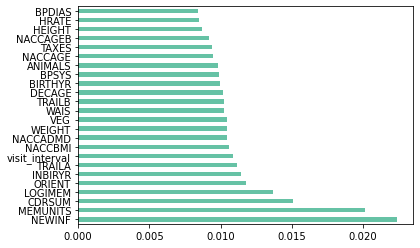

In [32]:
#Features sorted by their score
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')
cols=X_train.columns
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), cols), 
             reverse=True))

In [41]:
restrict=feat_importances.nlargest(56).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

In [43]:
model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7470997679814385
0.7417027417027418


0.5840909090909091

In [44]:
restrict=feat_importances.nlargest(24).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

In [45]:
model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7164733178654292
0.6891701828410689


0.5568181818181818

In [56]:
restrict=feat_importances.nlargest(100).index
res=df[restrict.to_list()]
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
recall_score(y_test,y_pred)

0.7545243619489559
0.7482319660537482


0.6011363636363637

### Exploring top 100 features

In [65]:
#normalized count function because libraries suck
def norm_count_single(df, column, target):
    c=column
    df1 = df.groupby(target)[c].value_counts(normalize=True)
    df1 = df1.rename('norm').reset_index()
    sns.barplot(x=c,y='norm',hue=target,data=df1)
    
def norm_count_group(df, target):    
    ix = 1
    fig = plt.figure(figsize = (15,10))
    for c in list(df.columns):
        if ix <= 3:
            if c != target:
                ax1 = fig.add_subplot(1,3,ix)
                df1 = df.groupby(target)[c].value_counts(normalize=True)
                df1 = df1.rename('norm').reset_index()
                sns.barplot(x=c,y='norm',hue=target,data=df1,ax = ax1)
                plt.xticks(rotation=45)

        ix = ix +1
        if ix == 4: 
            fig = plt.figure(figsize = (15,10))
            ix =1

C:\Users\viceva\miniconda3\envs\AD\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


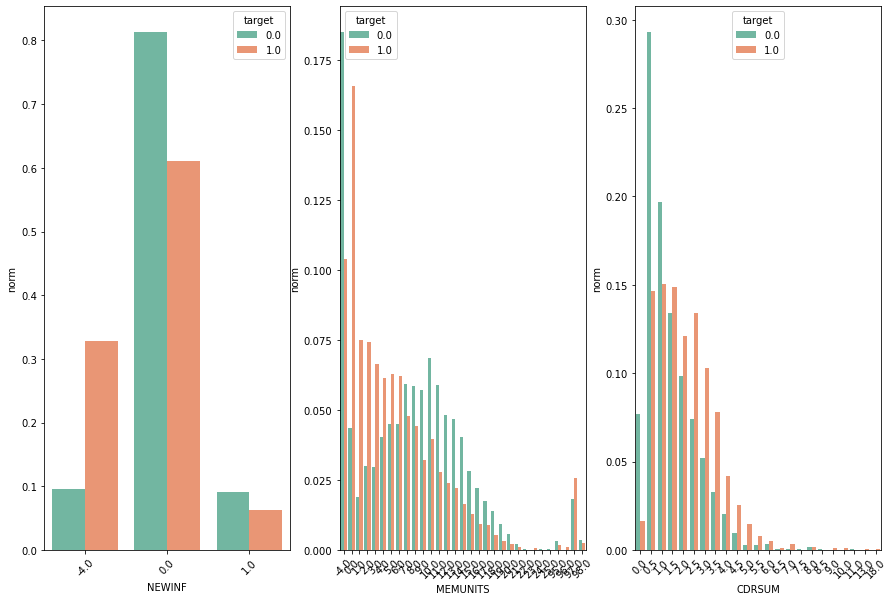

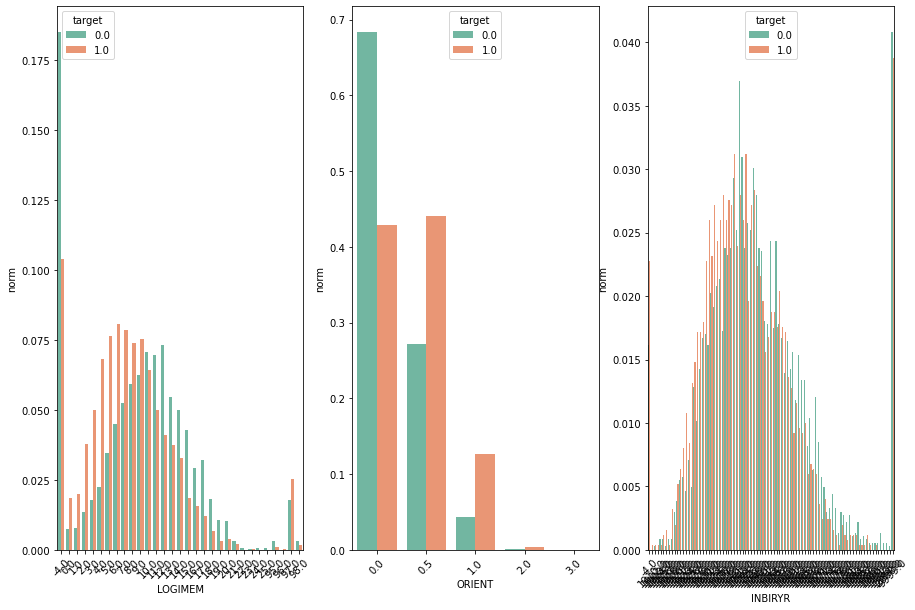

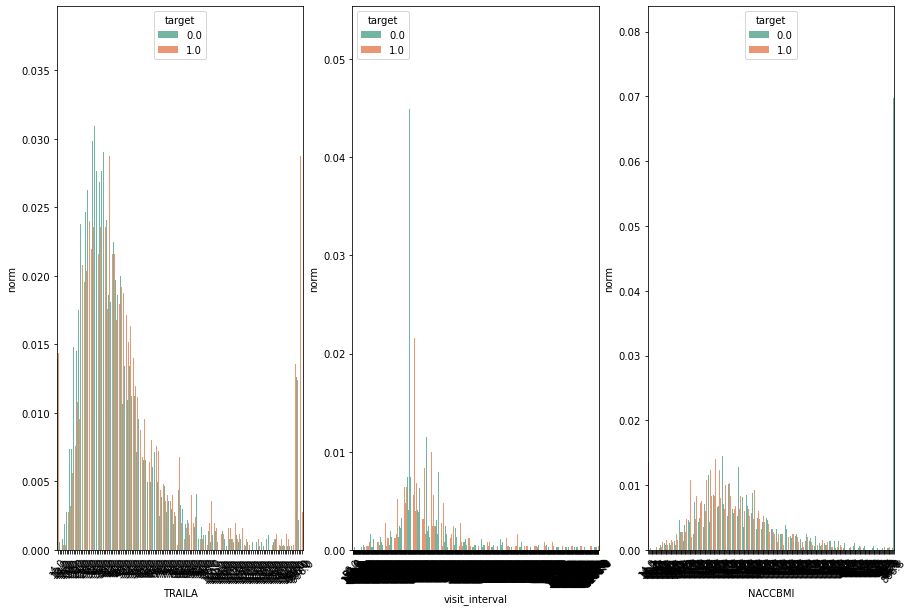

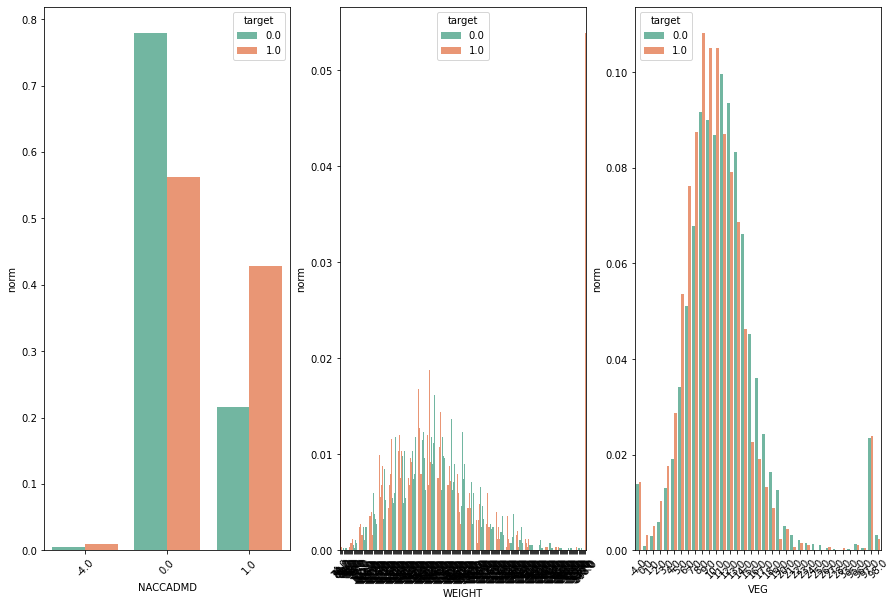

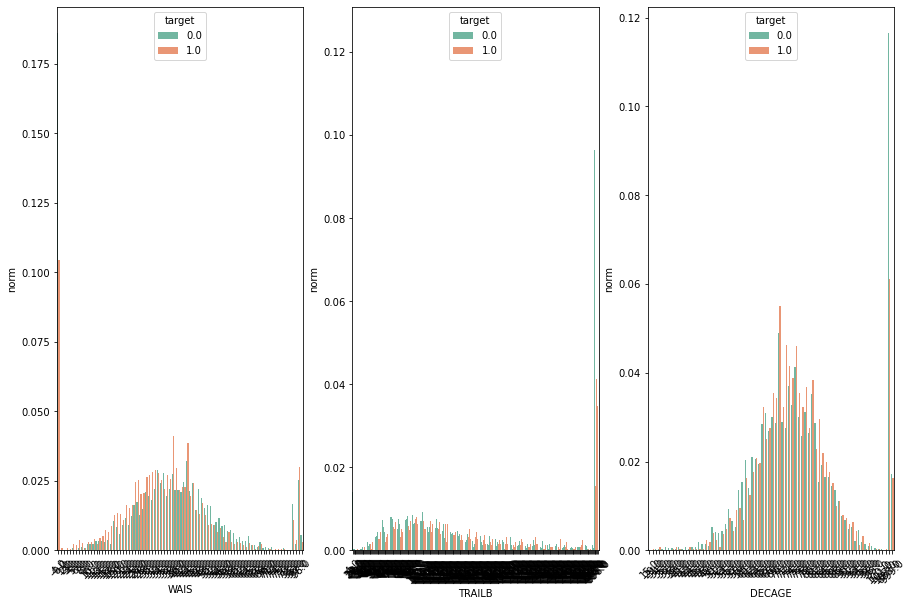

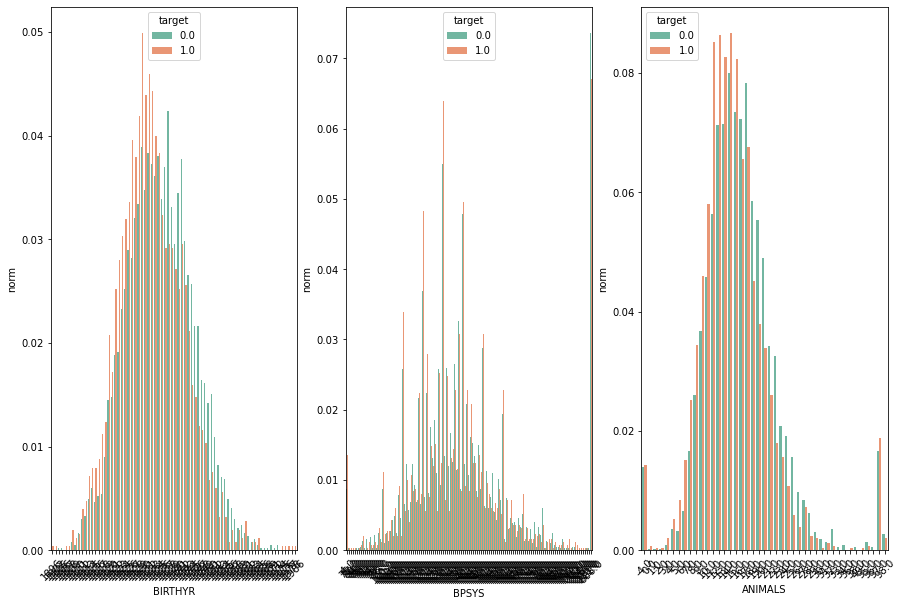

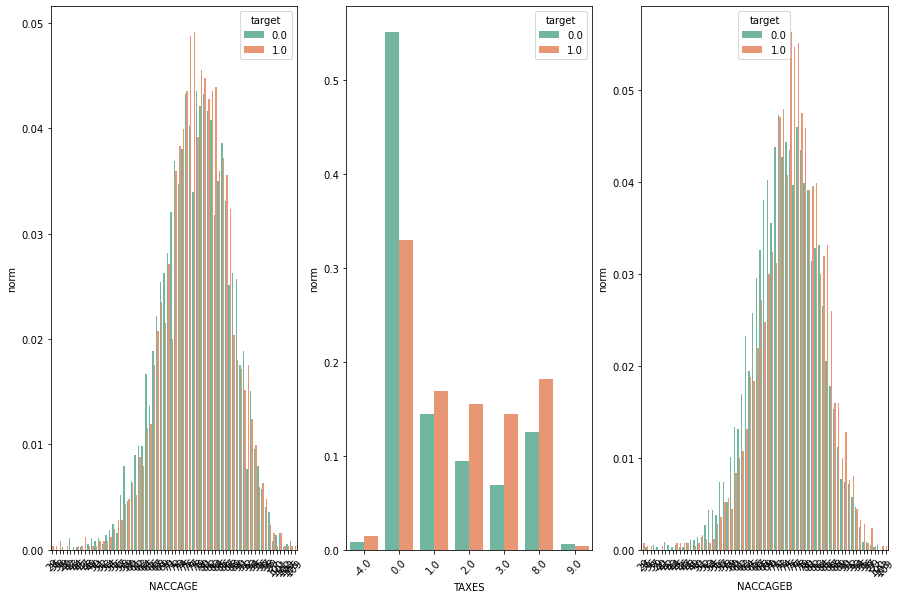

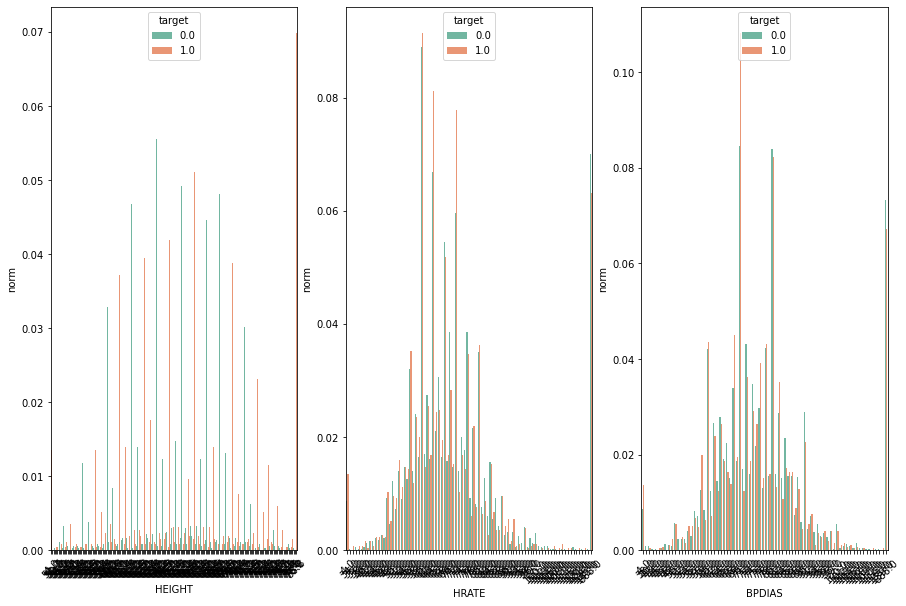

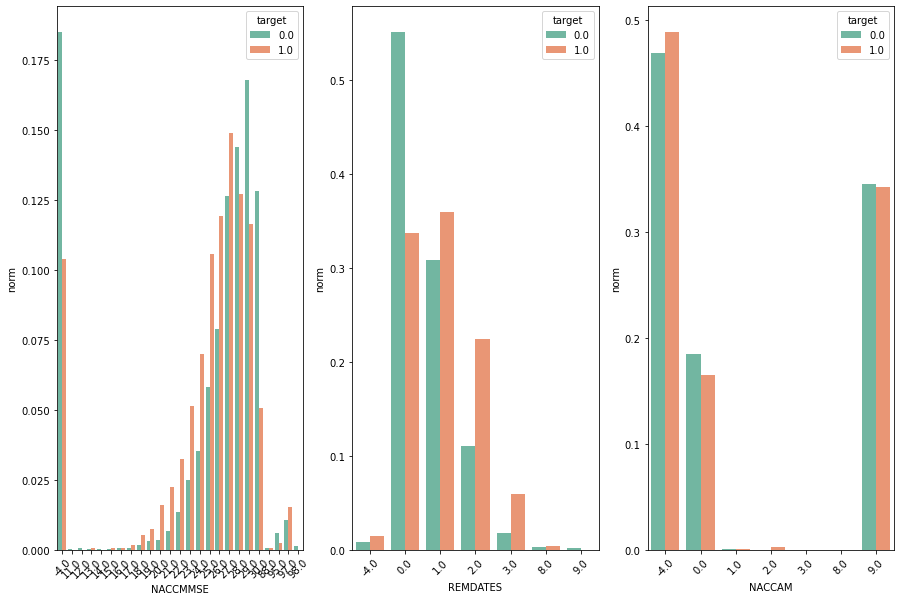

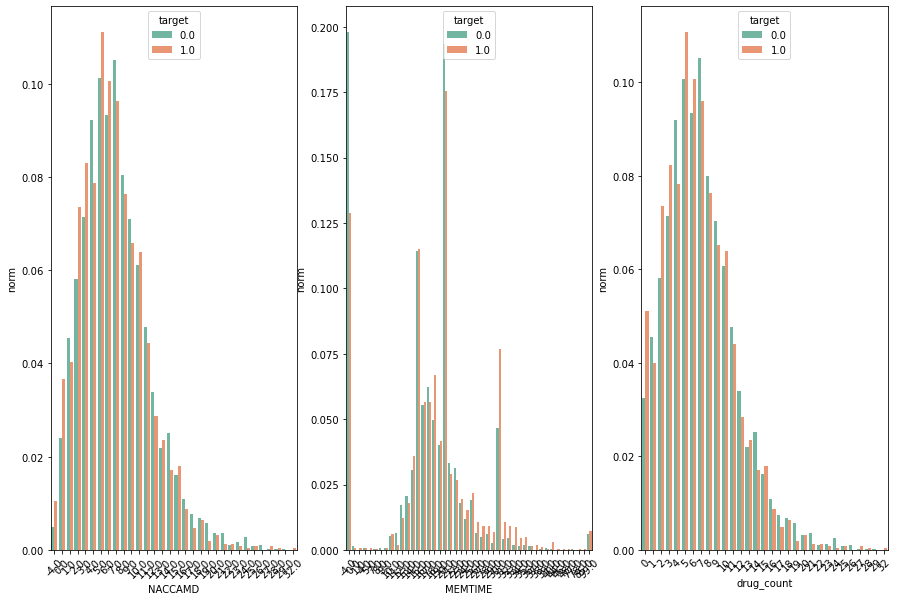

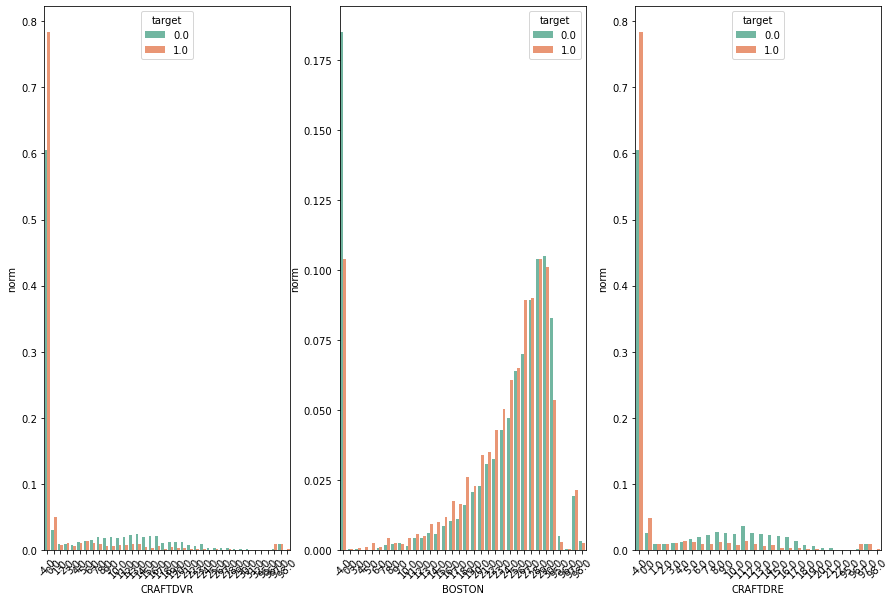

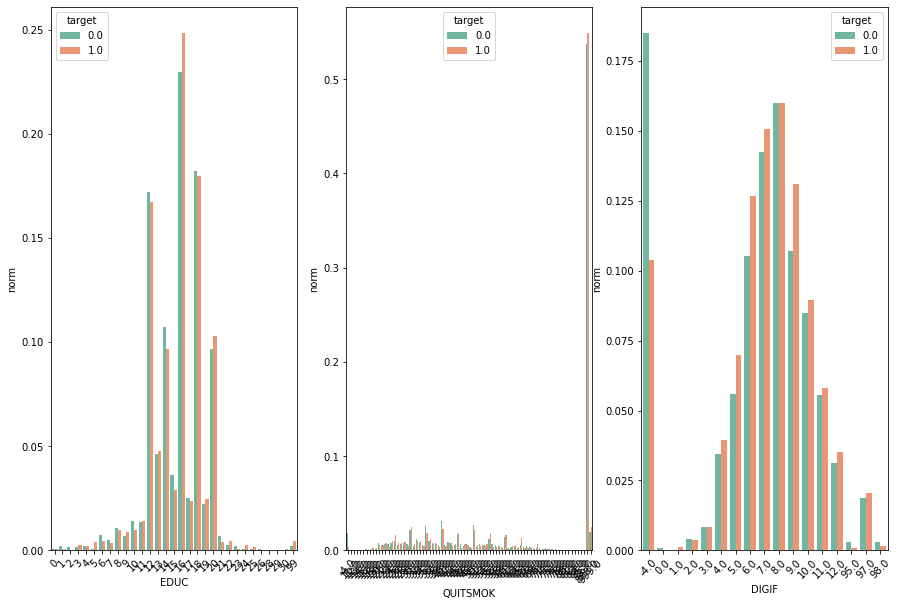

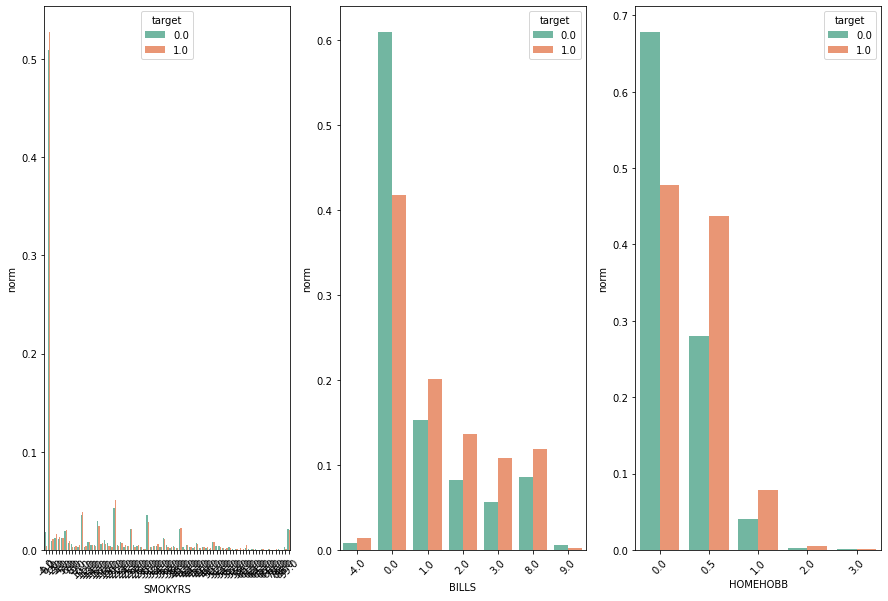

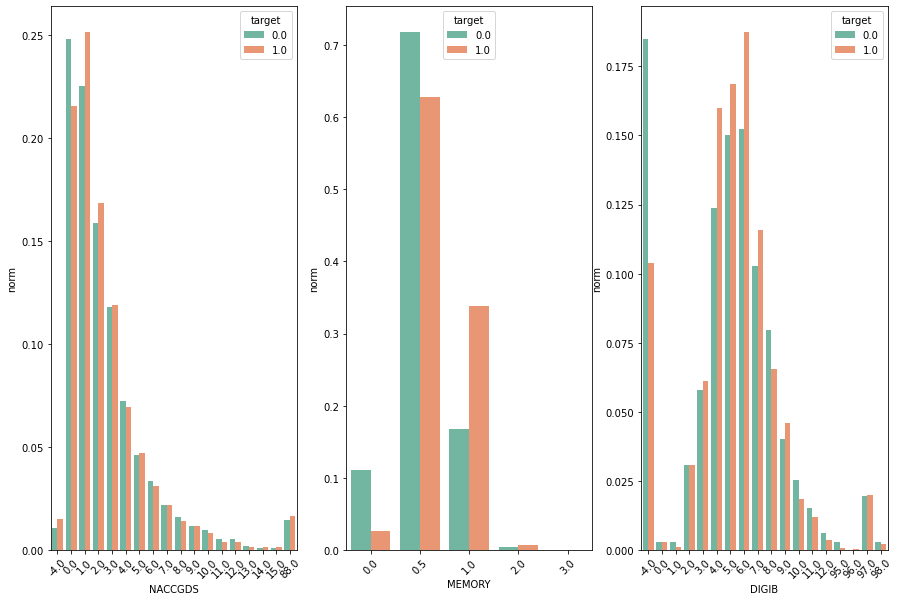

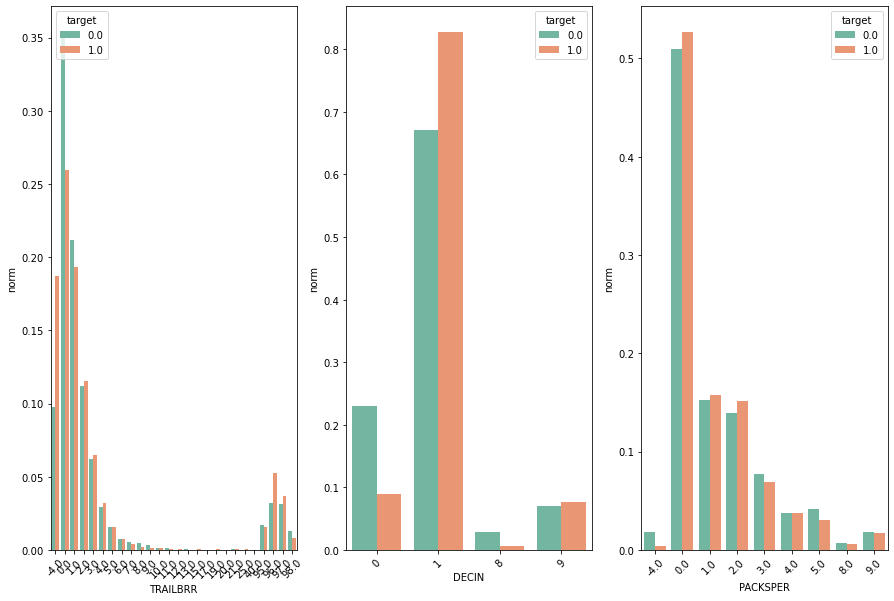

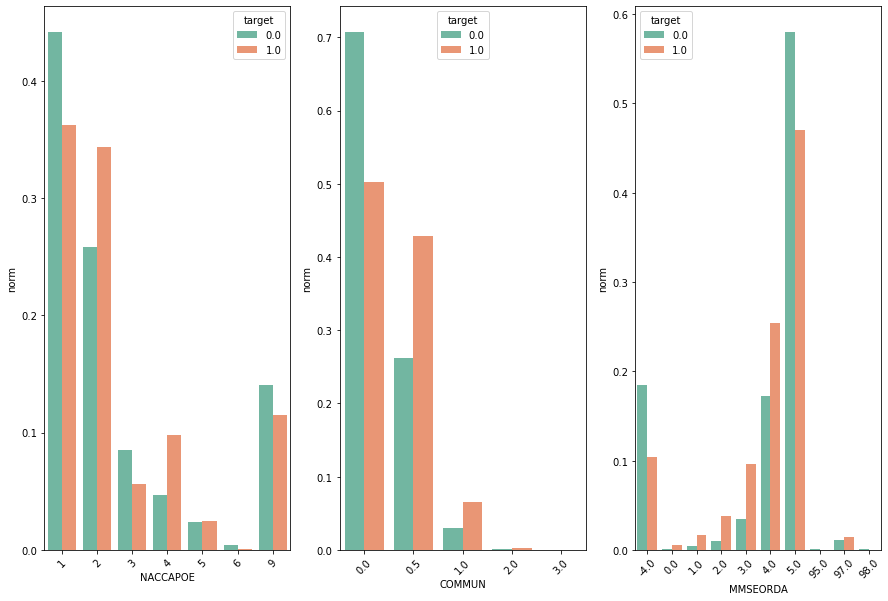

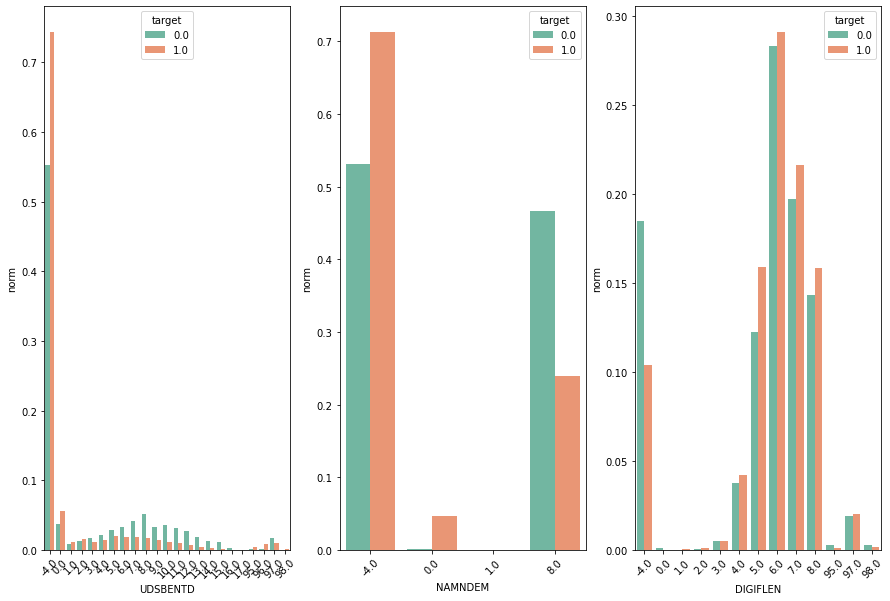

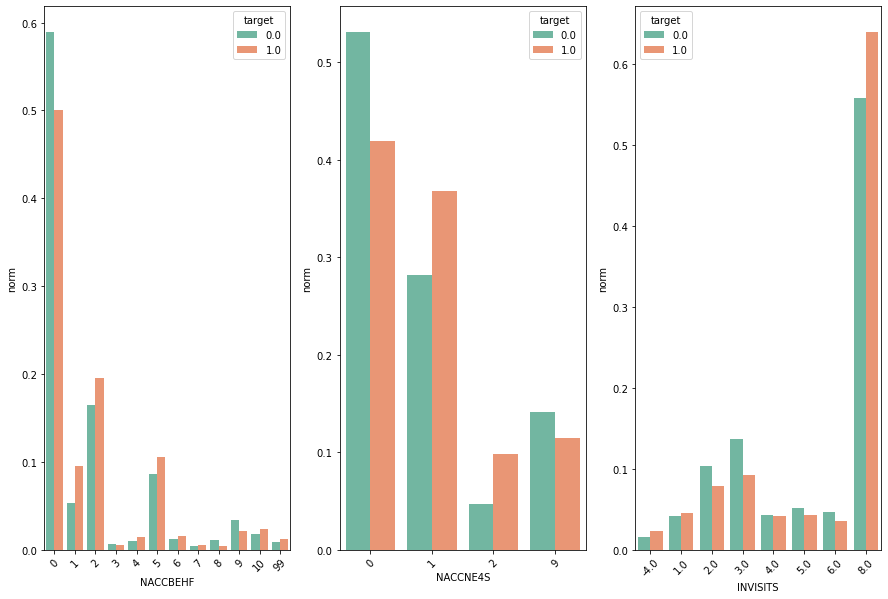

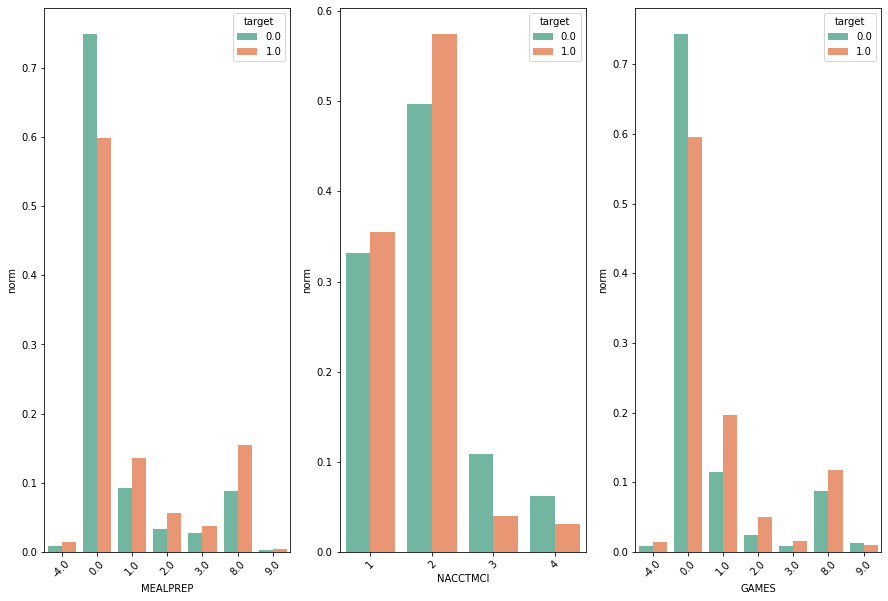

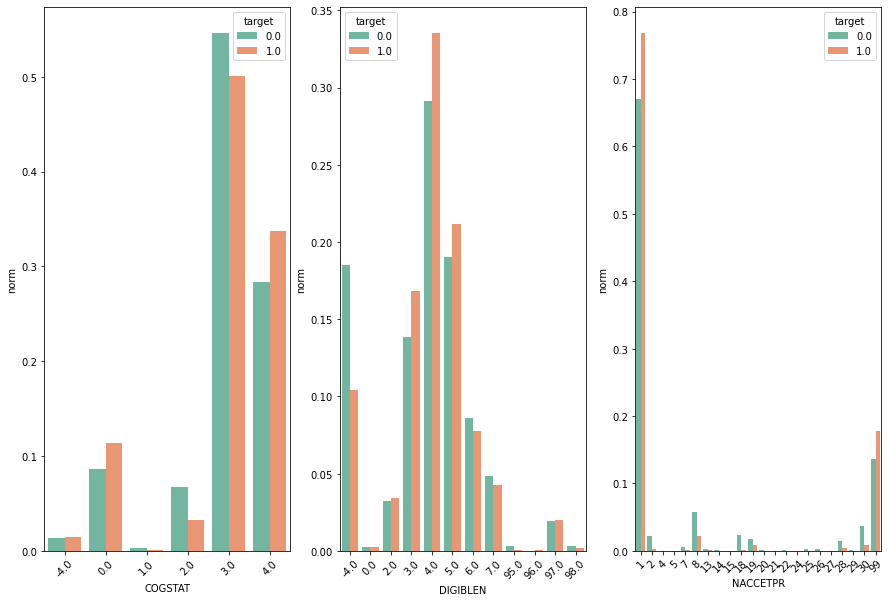

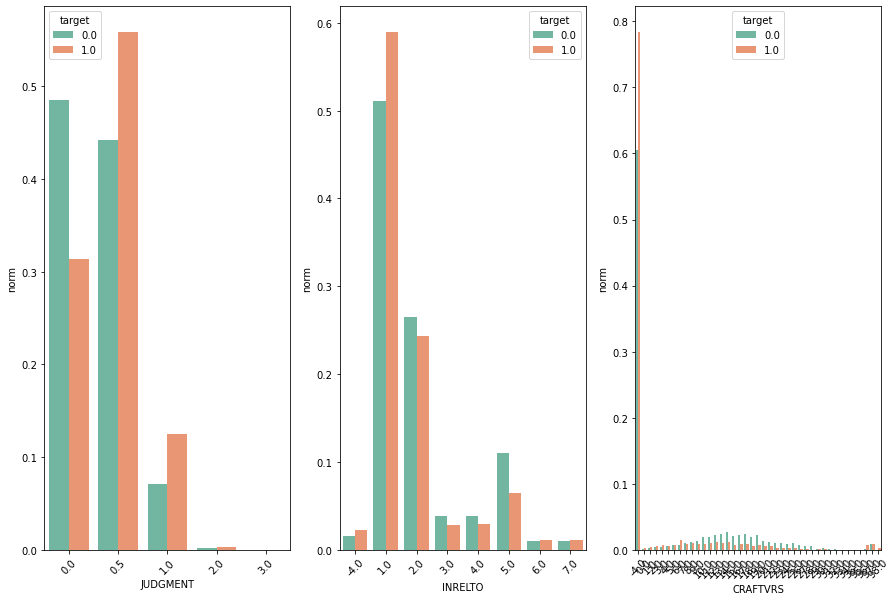

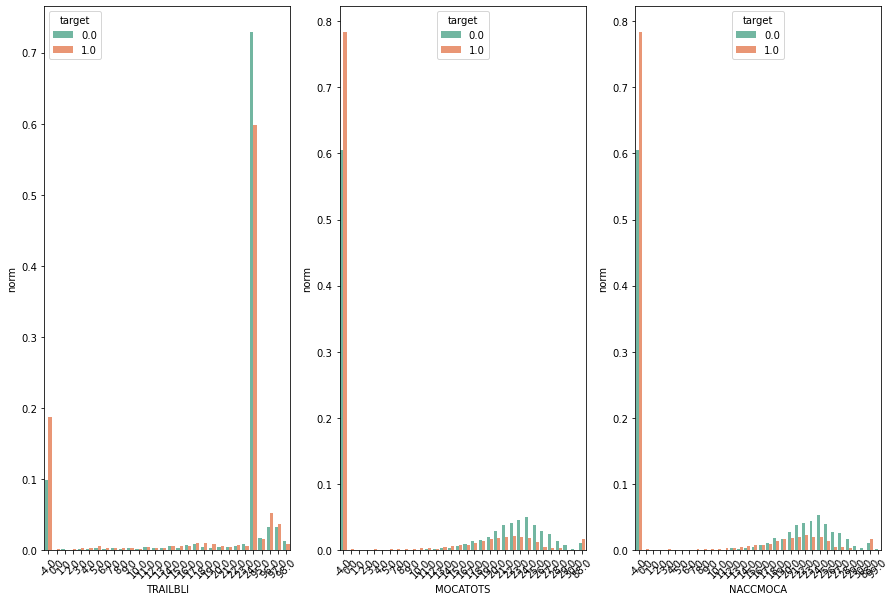

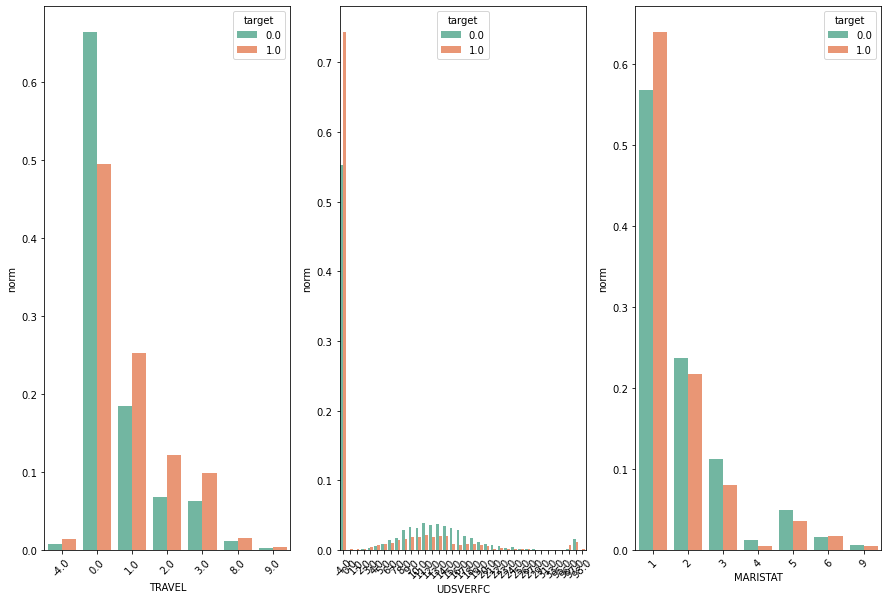

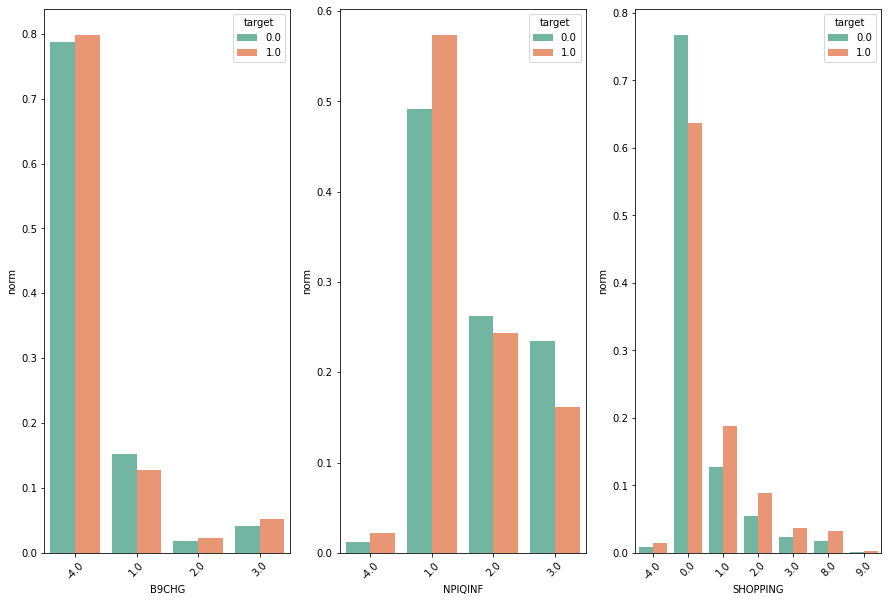

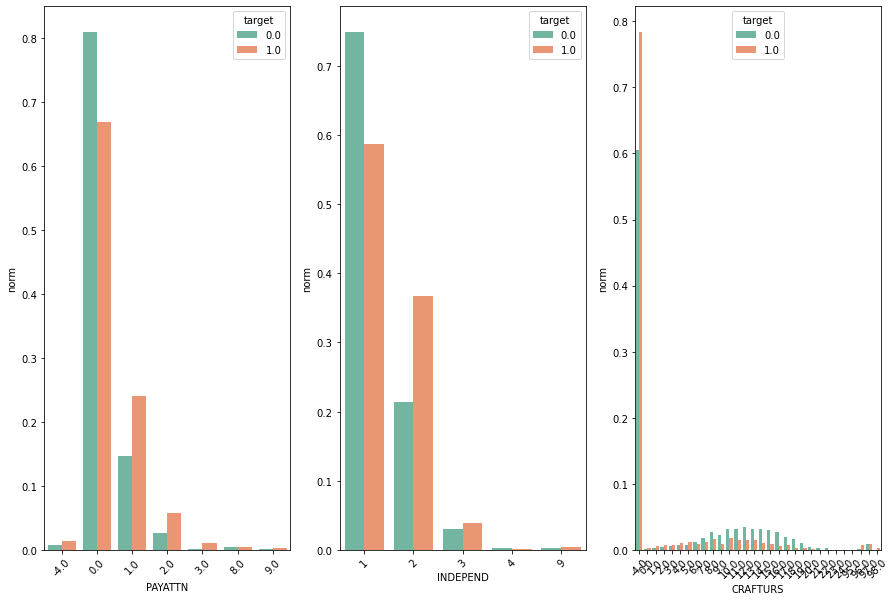

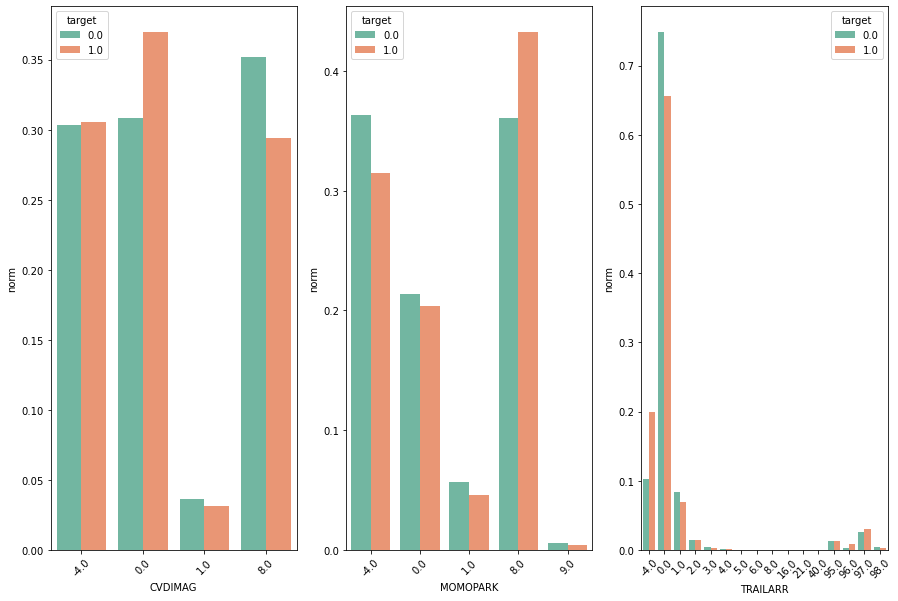

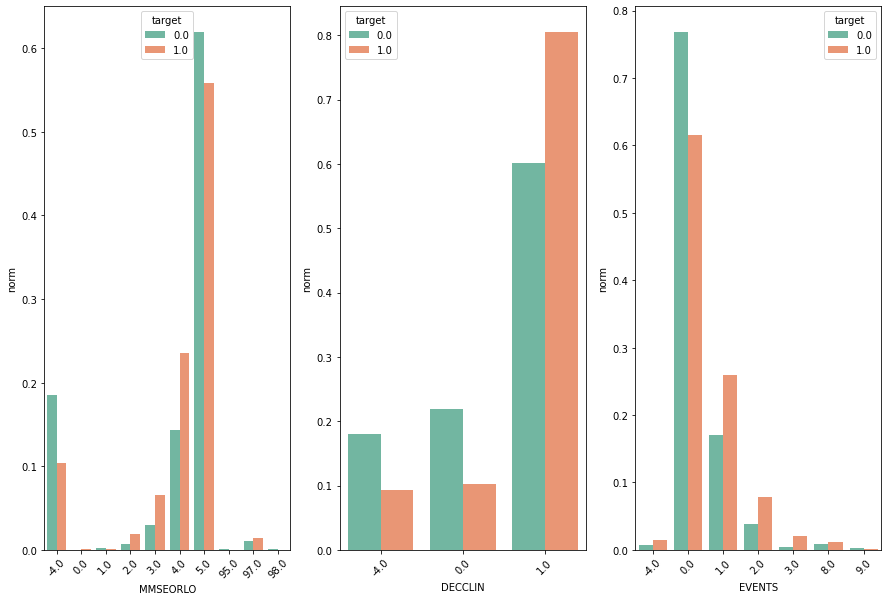

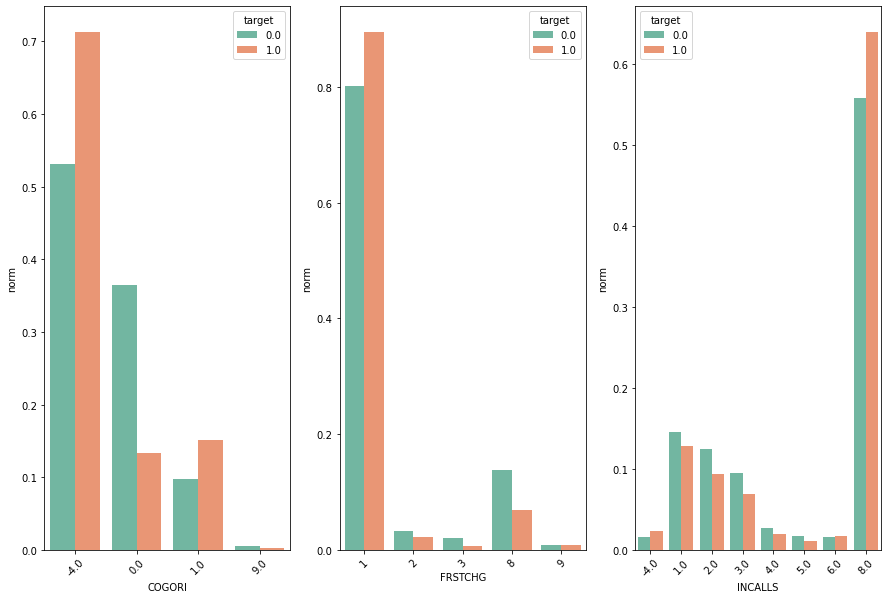

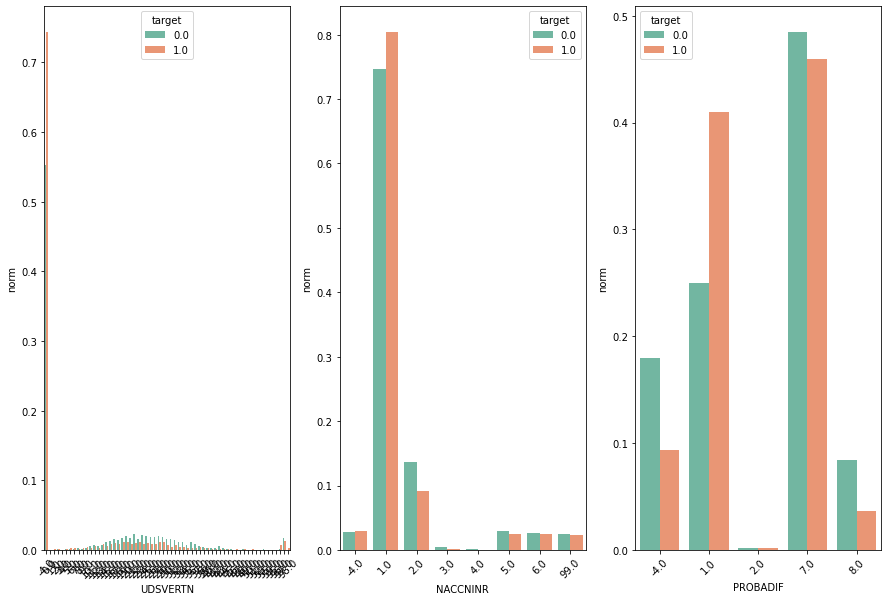

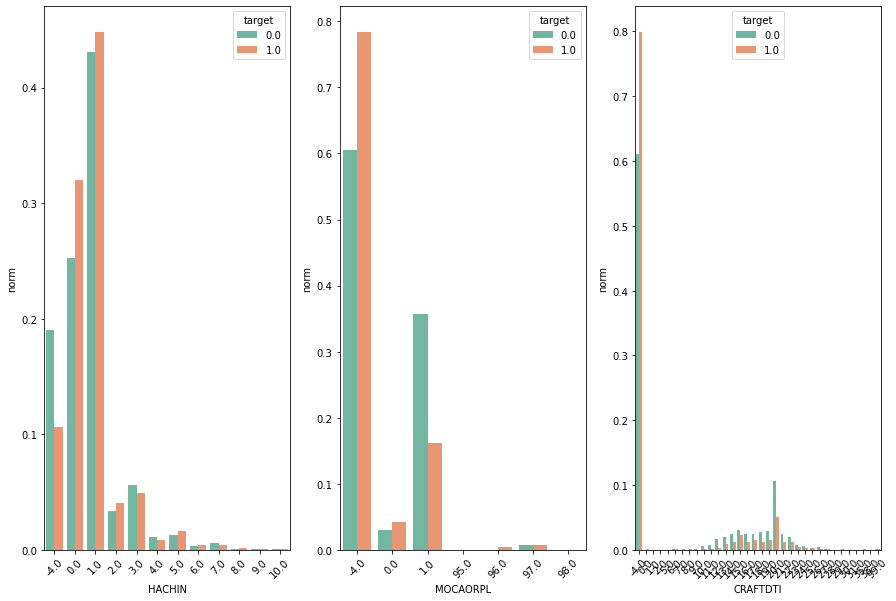

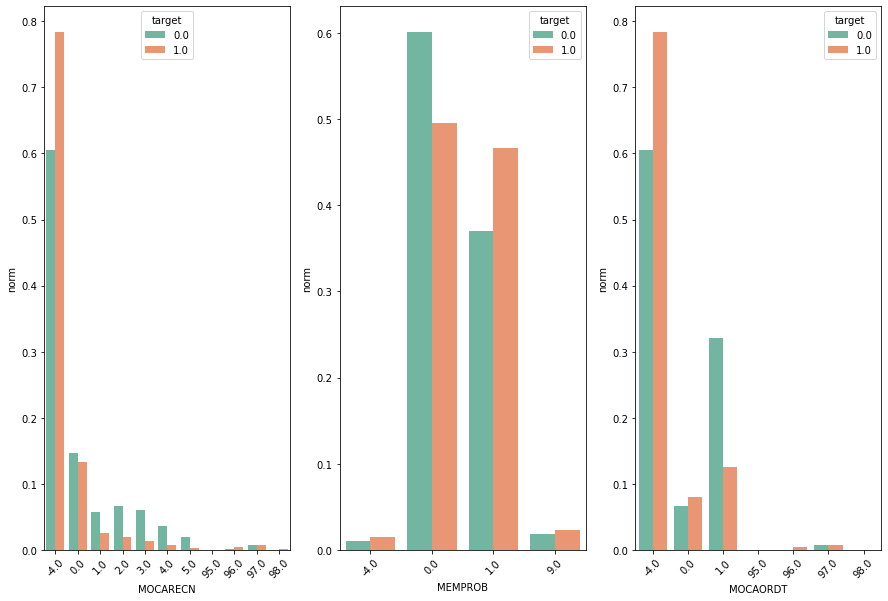

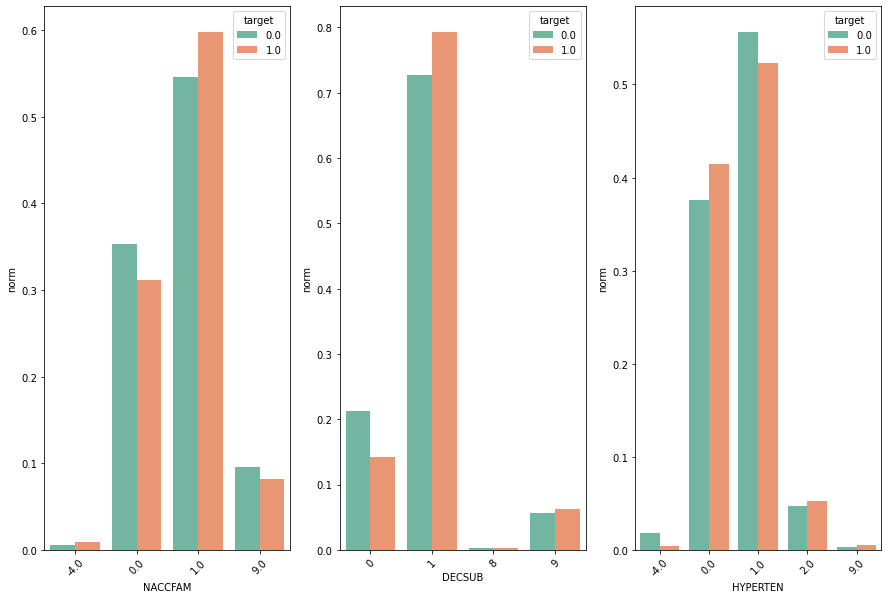

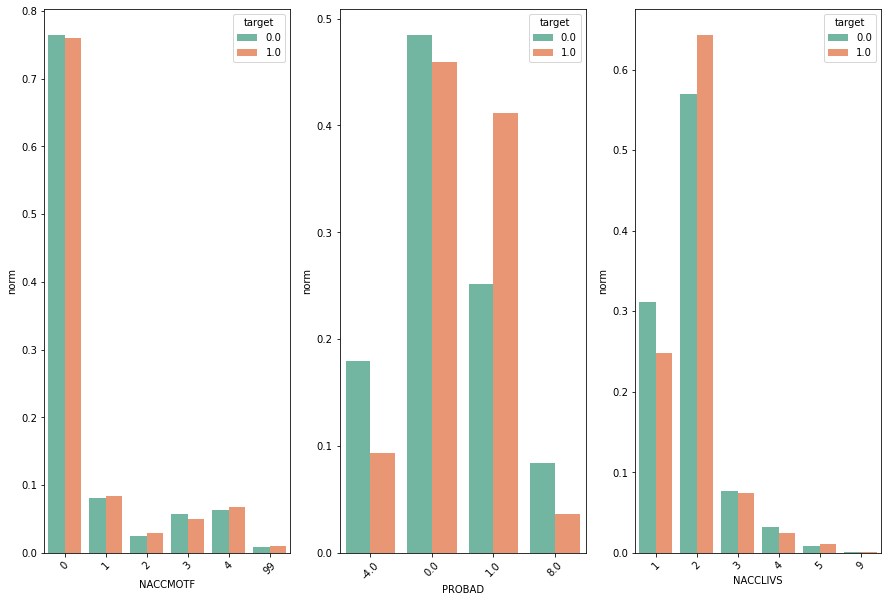

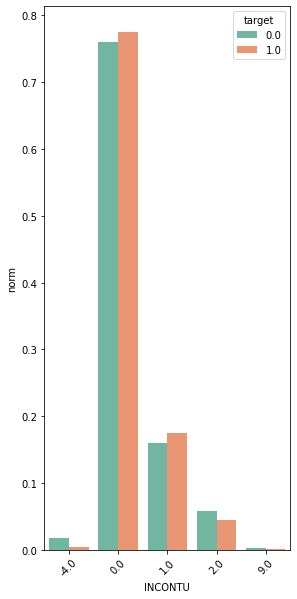

In [66]:
temp=res.copy()
temp['target']=df['target']
norm_count_group(temp,'target')

Let's do some tests without coparticipant

0.7438515081206497
0.7376811594202899
0.5784090909090909


<AxesSubplot:>

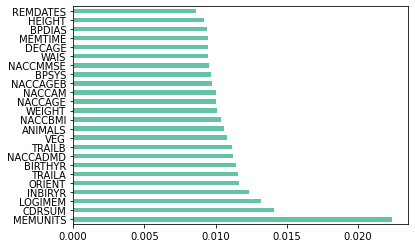

In [71]:
res=df.drop(['NEWINF','target','visit_interval'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')

Precision is lower but overall works fine

What's the performance if we drop tests that have >50% null

In [75]:
restricted = df.loc[:,~df.eq(-4).sum().gt(len(df)/2)]
restricted

,BIRTHYR,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,MARISTAT,NACCLIVS,...,NACCTCSF,NACCMRSA,NACCNMRI,NACCAPSA,NACCNAPA,NACCAPOE,NACCNE4S,visit_interval,target,drug_count
0,1920,0,88,5,88,88,1,15,1,2,...,0,0,0,0,0,1,0,427.0,1.0,5
1,1939,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,2,1,474.0,1.0,4
2,1932,0,88,5,88,88,3,20,1,2,...,0,0,0,0,0,1,0,413.0,1.0,7
3,1935,0,88,1,88,88,1,24,2,1,...,0,0,0,0,0,1,0,327.0,1.0,8
4,1935,0,88,1,88,88,1,20,2,1,...,0,0,0,0,0,2,1,264.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1921,0,88,1,88,88,1,12,1,2,...,0,0,0,0,0,9,9,370.0,0.0,9
6152,1951,0,88,1,88,88,1,16,1,2,...,0,1,1,0,0,2,1,723.0,0.0,5
6153,1930,0,88,1,88,88,1,16,1,3,...,0,0,0,0,0,1,0,351.0,0.0,3
6154,1928,0,88,1,88,88,1,16,1,2,...,0,0,0,0,0,1,0,315.0,0.0,7


0.7122969837587007
0.6934523809523809
0.5295454545454545


<AxesSubplot:>

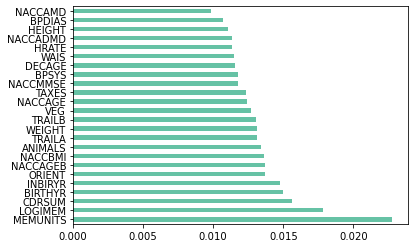

In [76]:
res=restricted.drop(['NEWINF','target','visit_interval'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(res, df['target'], test_size=0.35, random_state=1)

model_feat1 = RandomForestClassifier()
#train model
model_feat1.fit(X_train, y_train)
y_pred = model_feat1.predict(X_test)
print(model_feat1.score(X_test, y_test))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


#Features sorted by their score
feat_importances = pd.Series(model_feat1.feature_importances_, index=X_train.columns)
feat_importances.nlargest(24).plot(kind='barh')

C:\Users\viceva\miniconda3\envs\AD\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


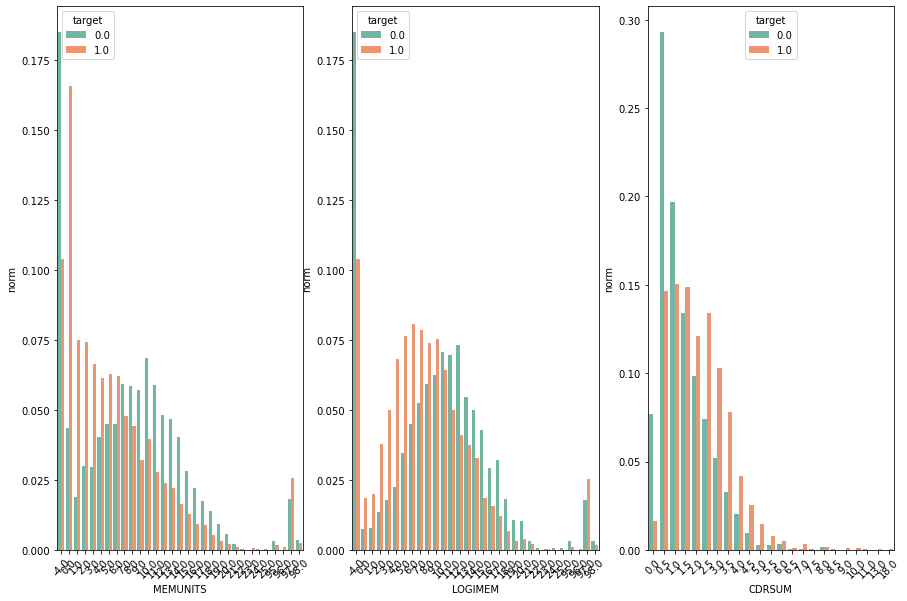

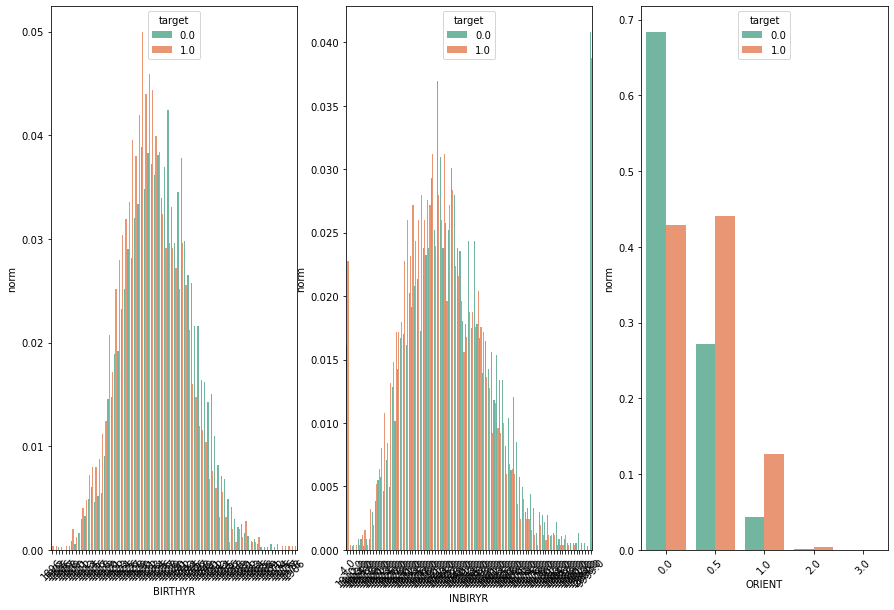

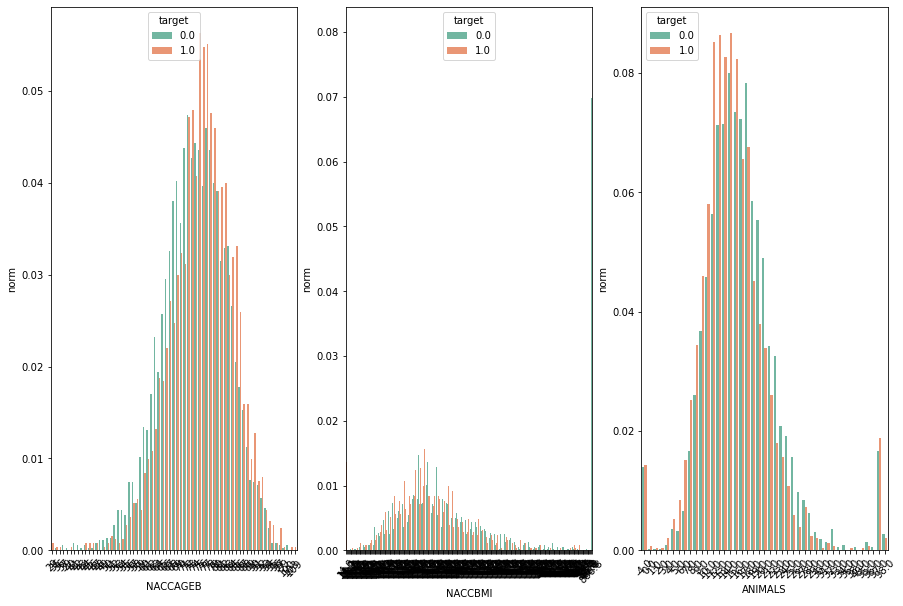

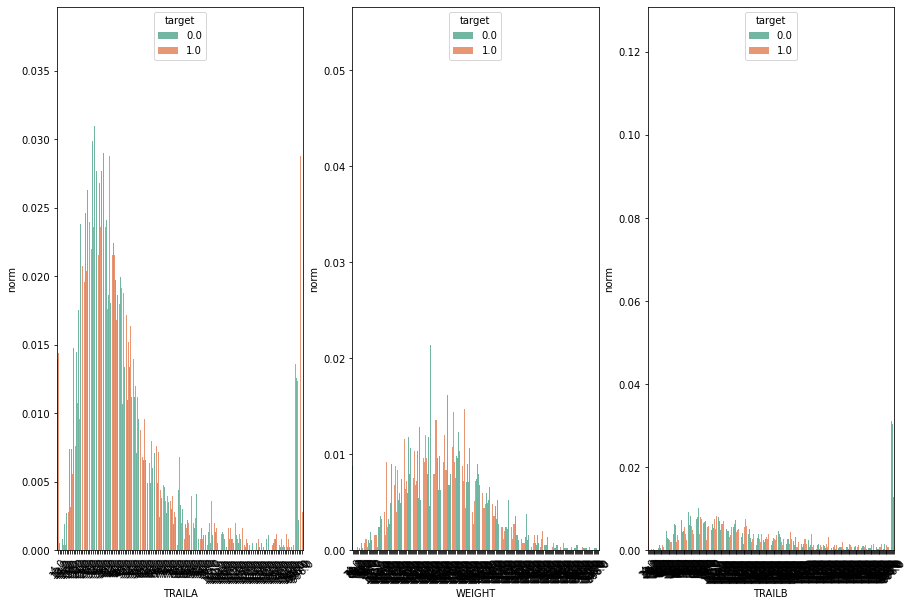

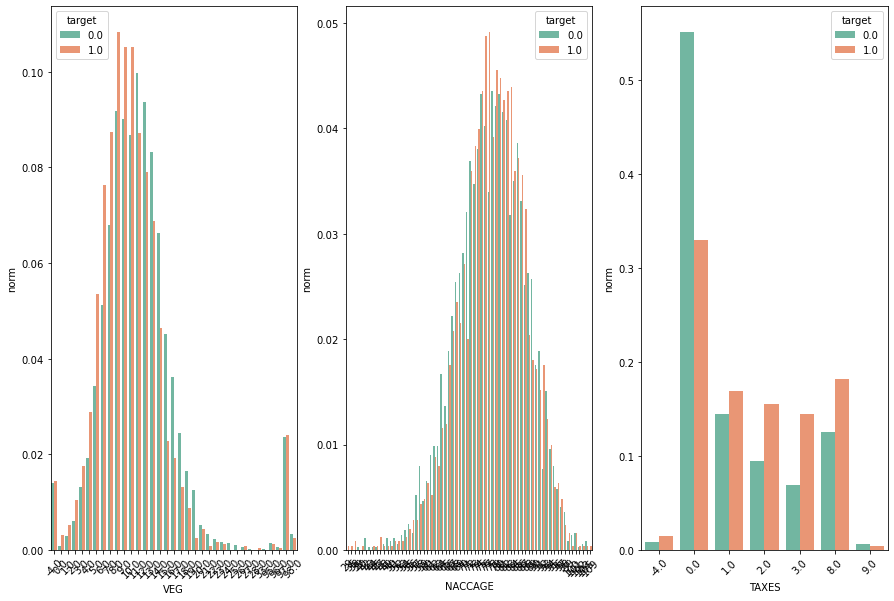

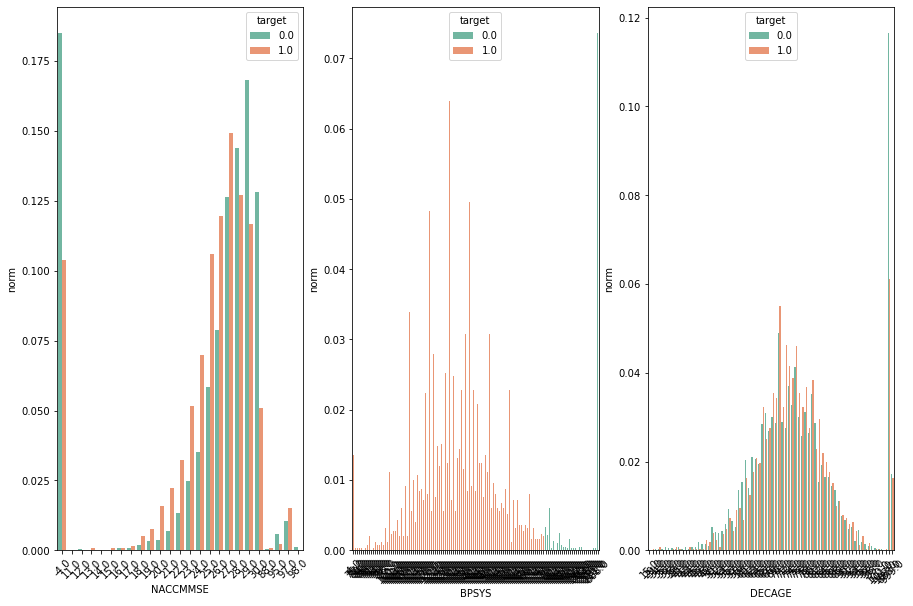

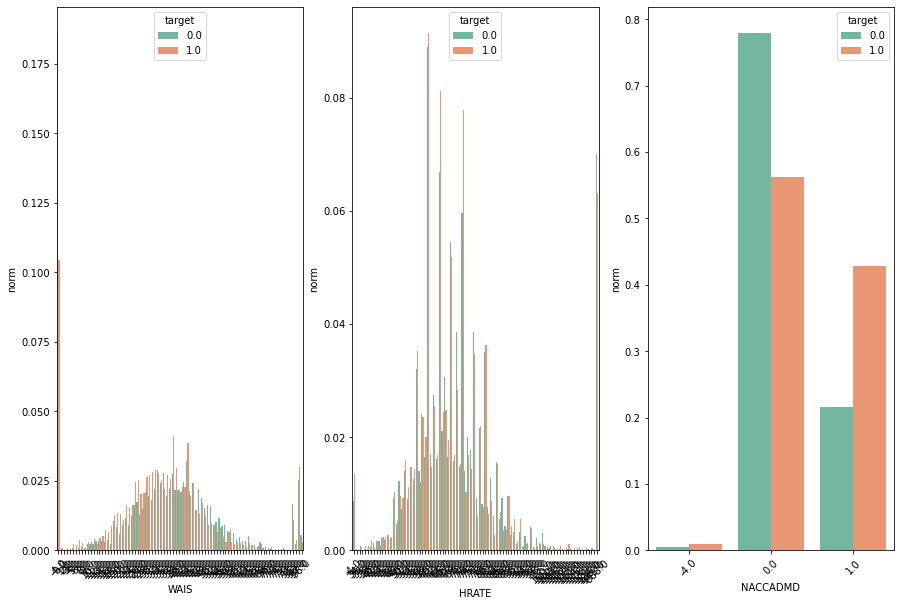

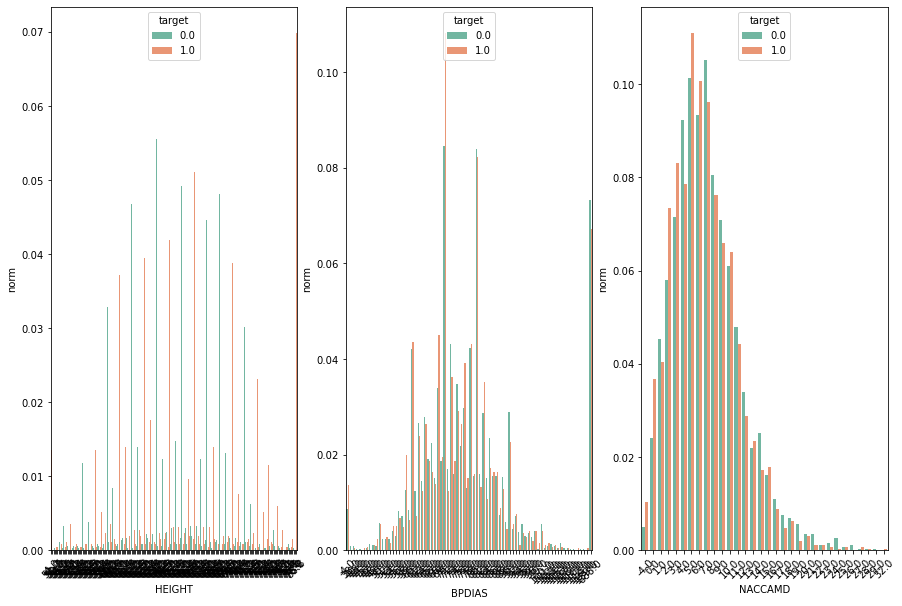

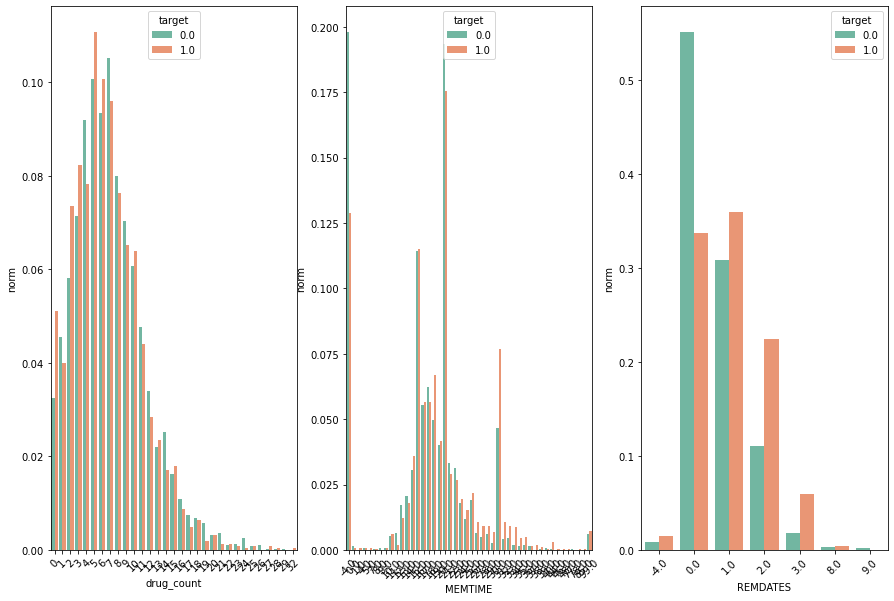

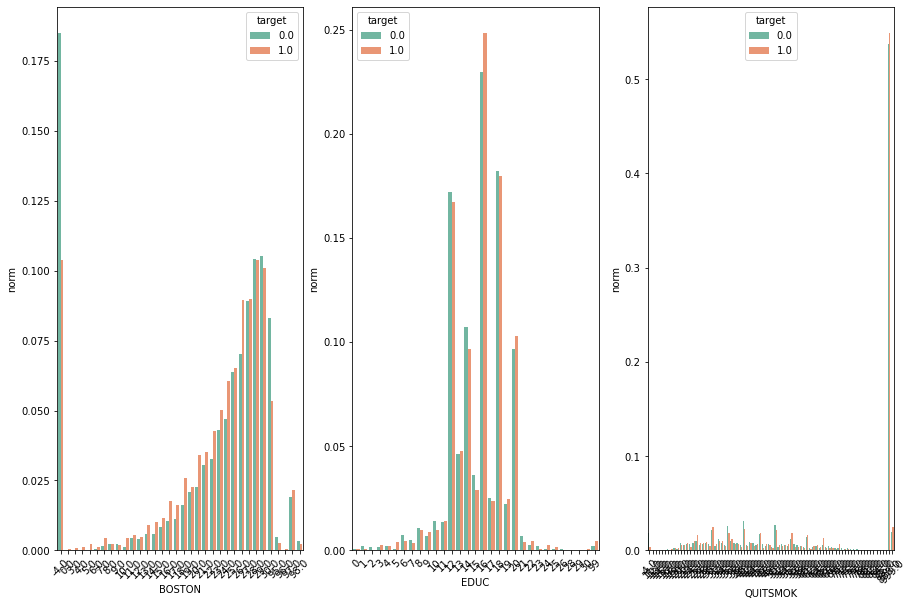

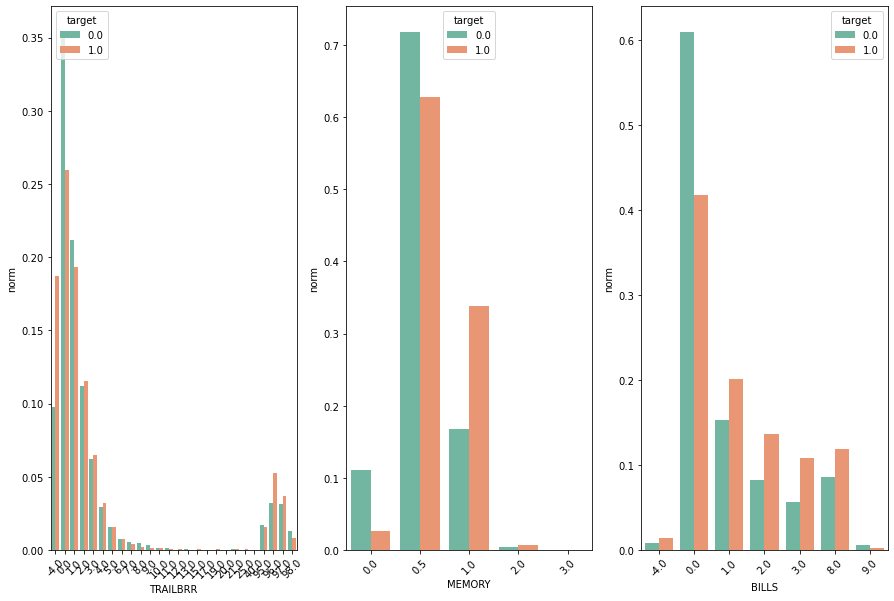

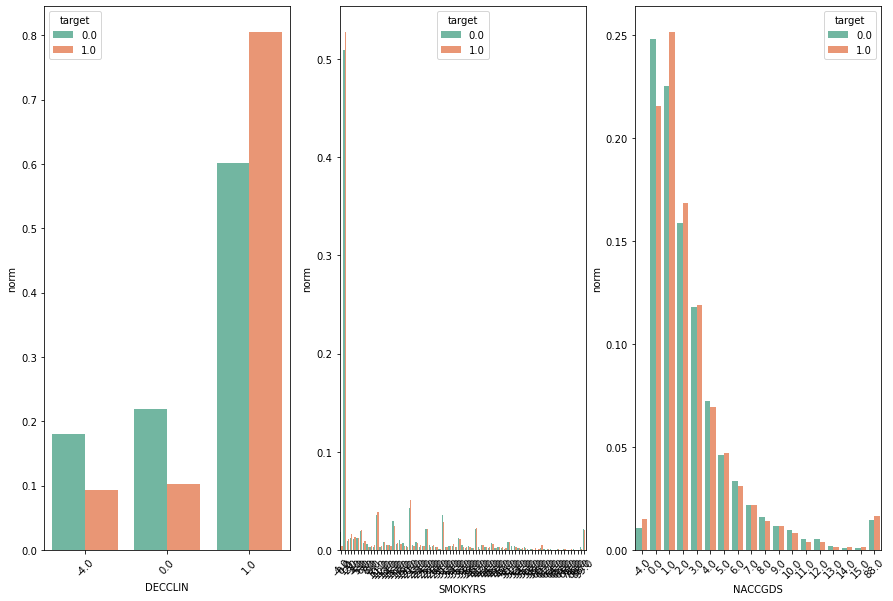

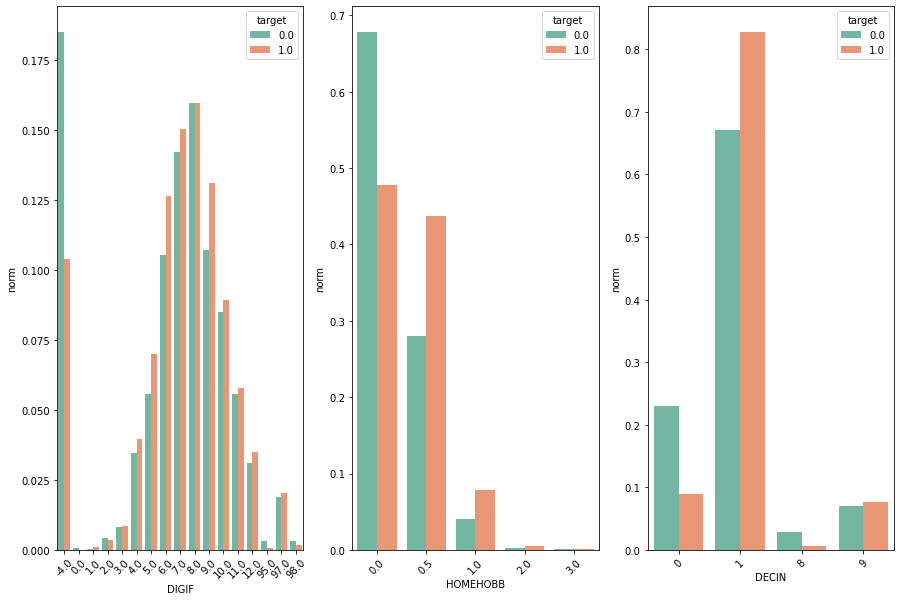

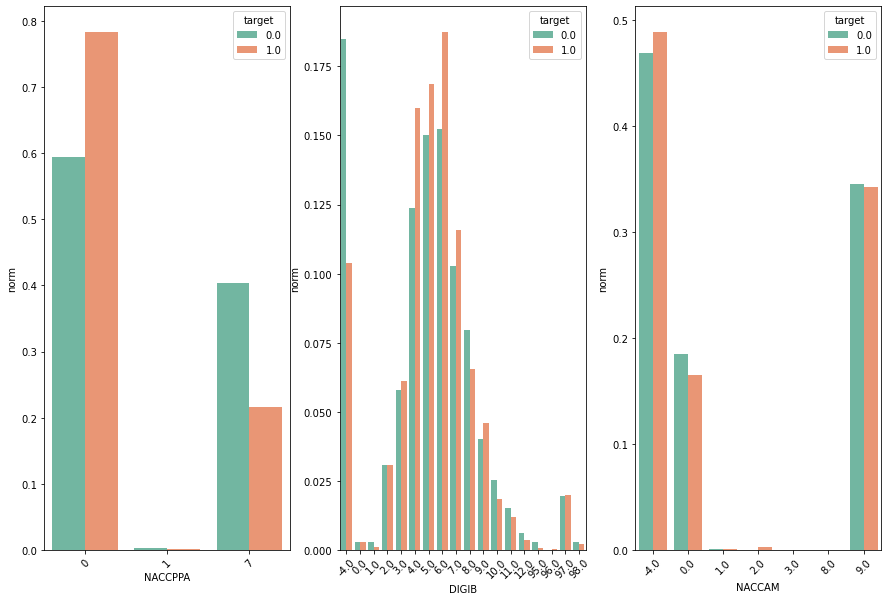

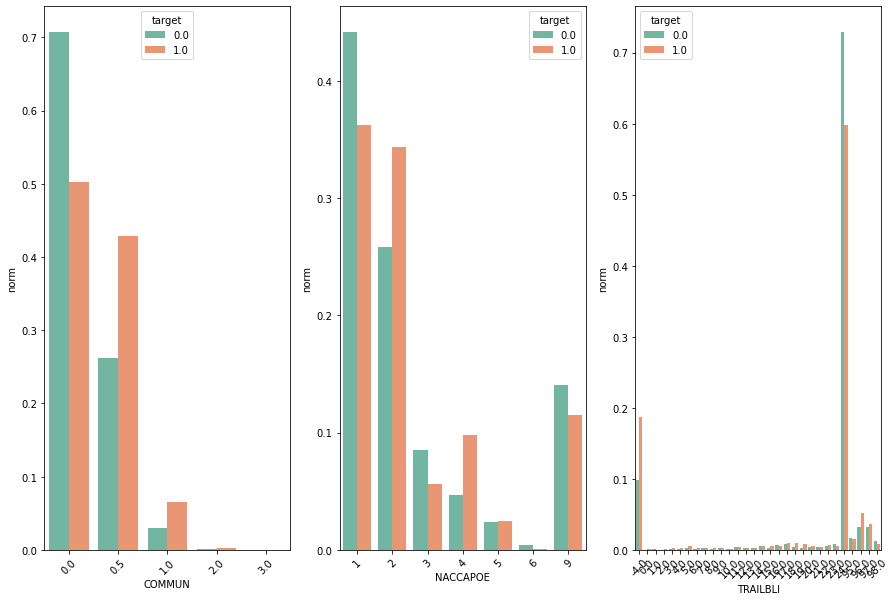

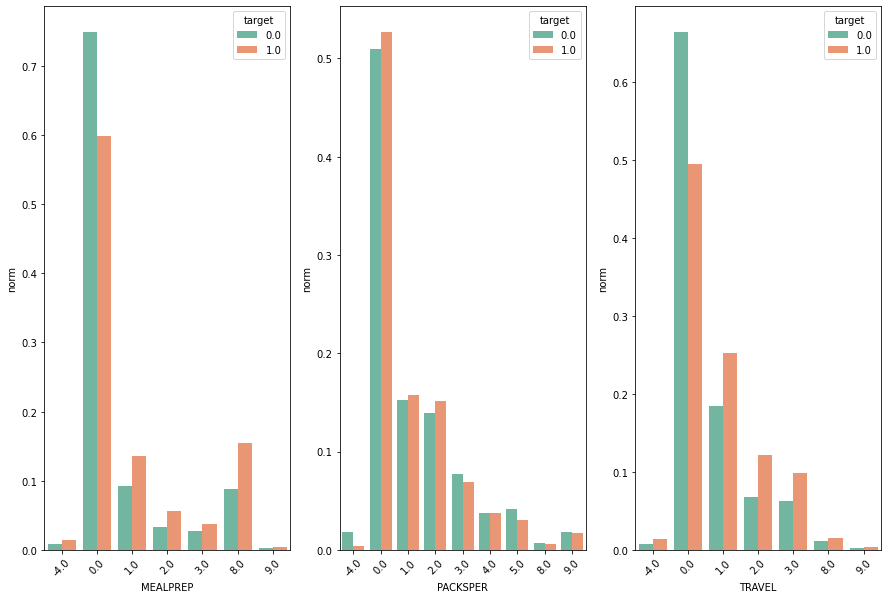

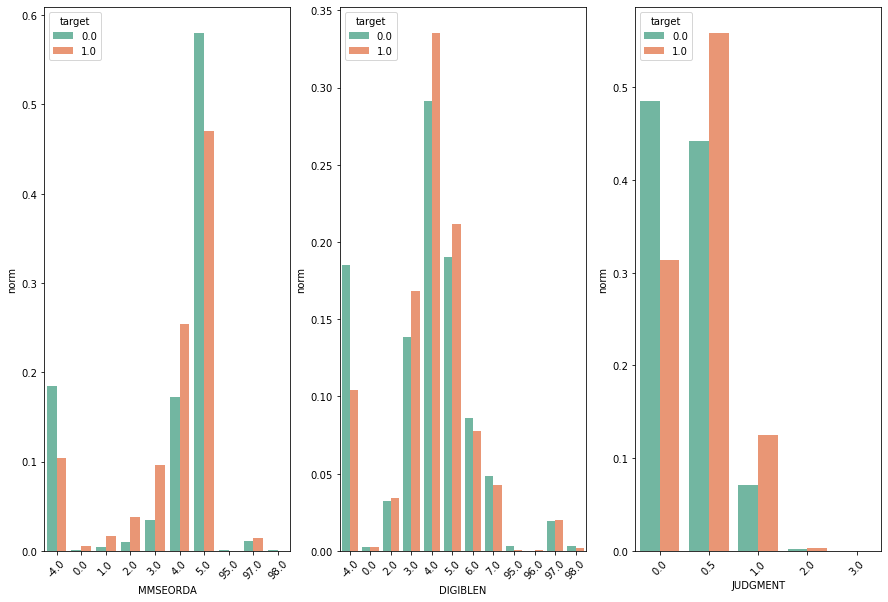

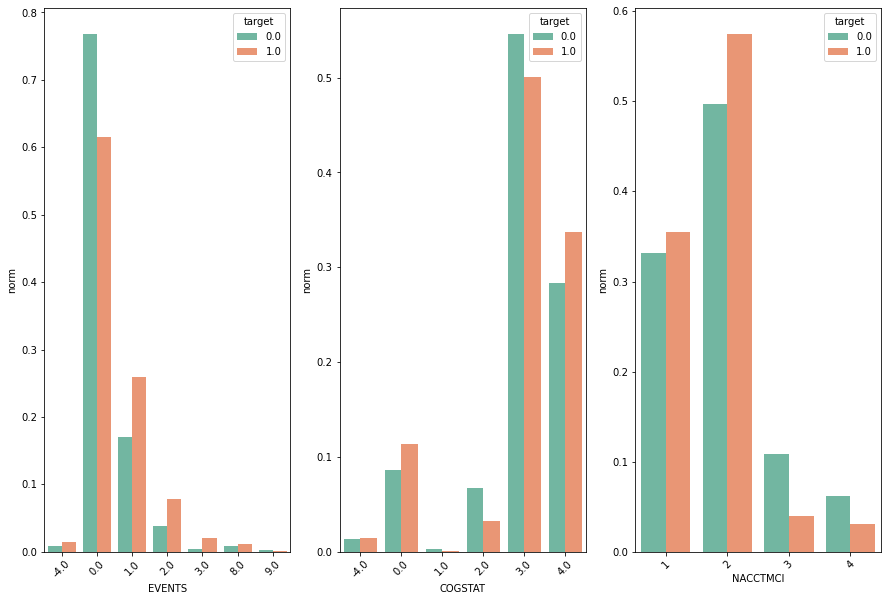

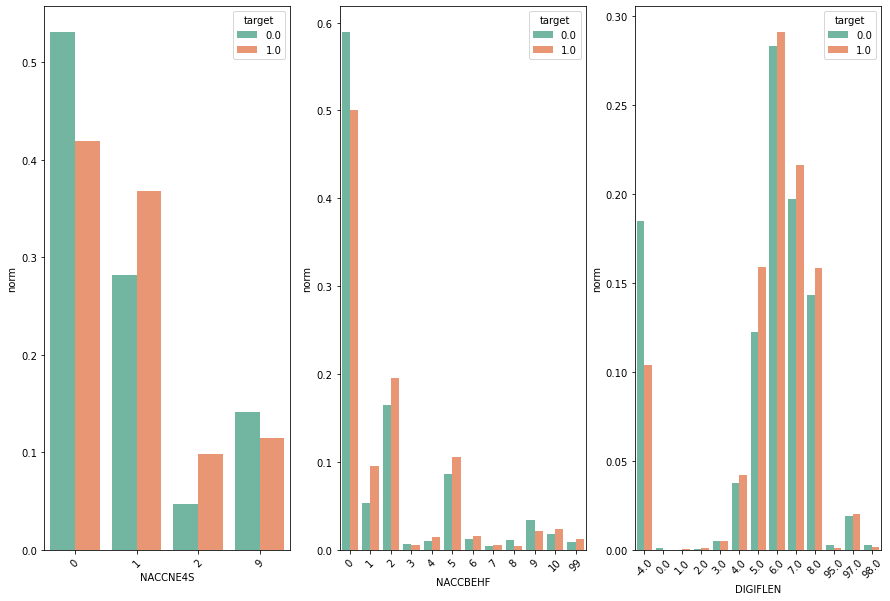

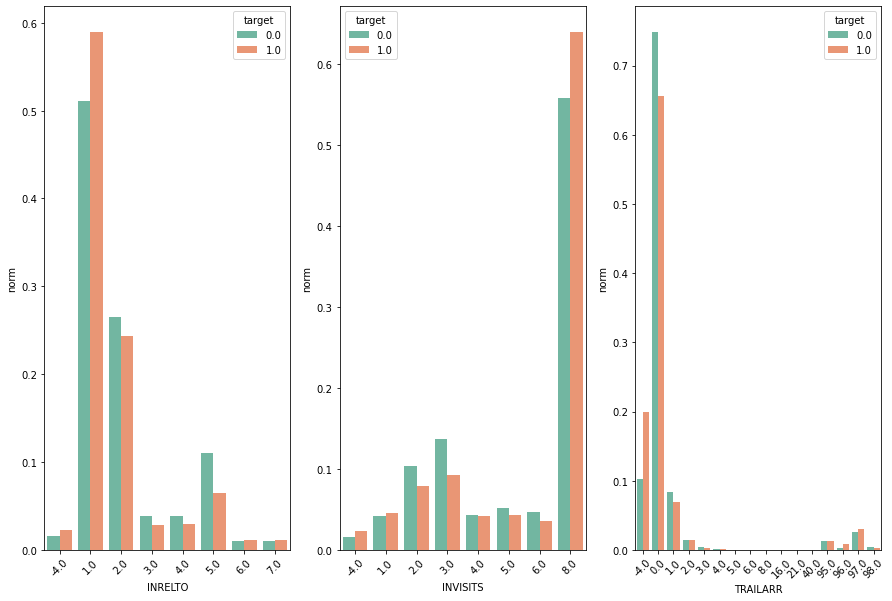

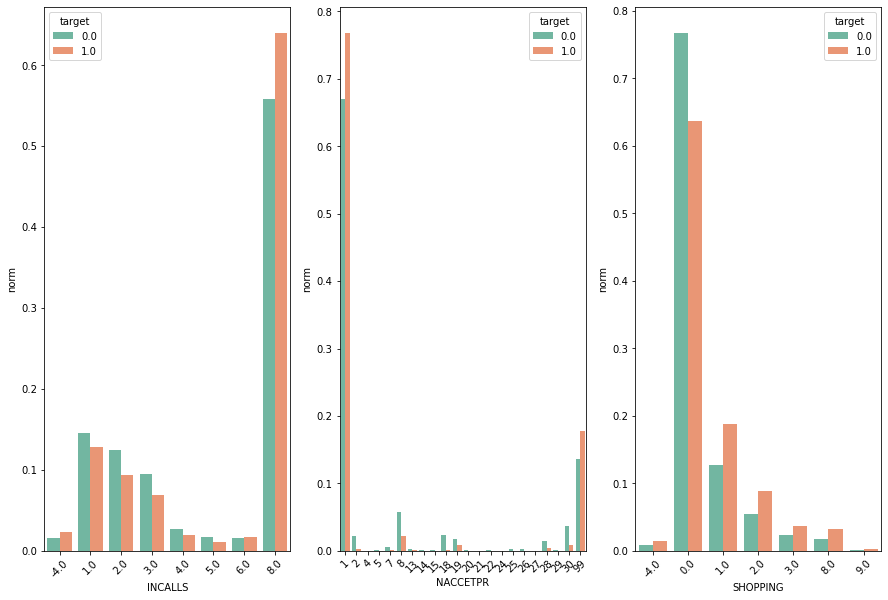

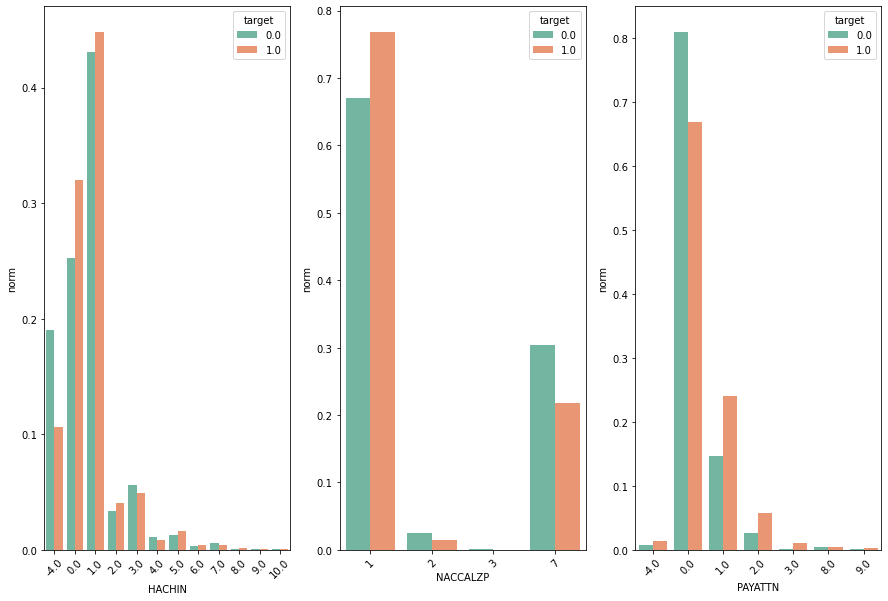

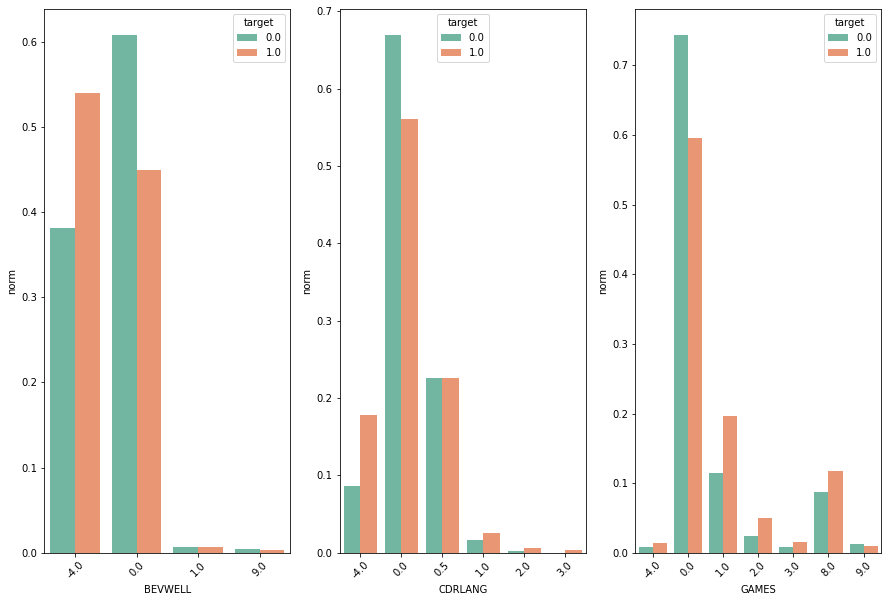

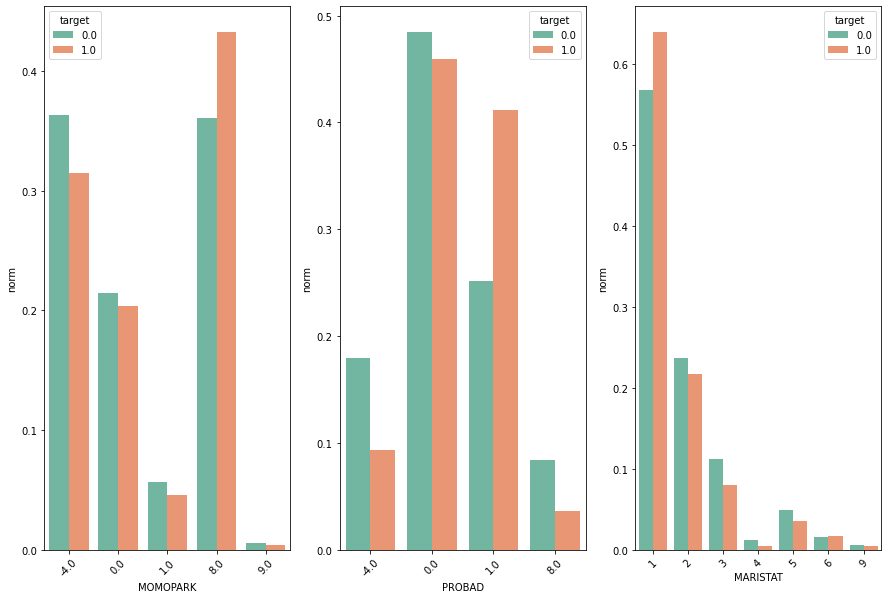

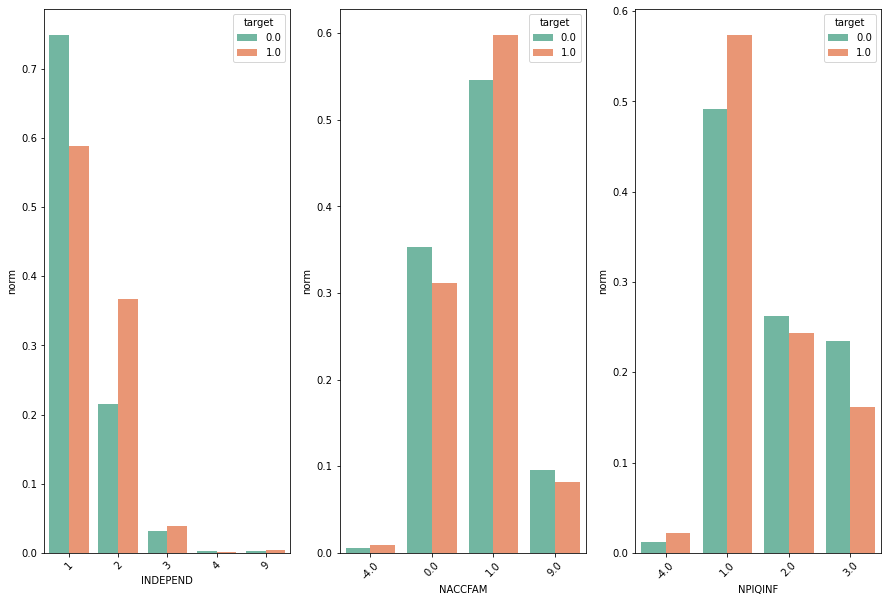

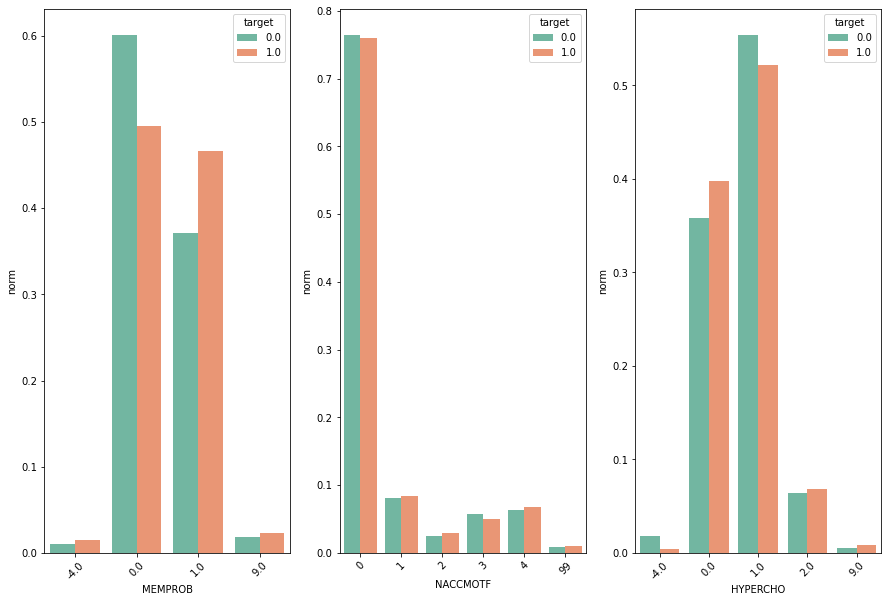

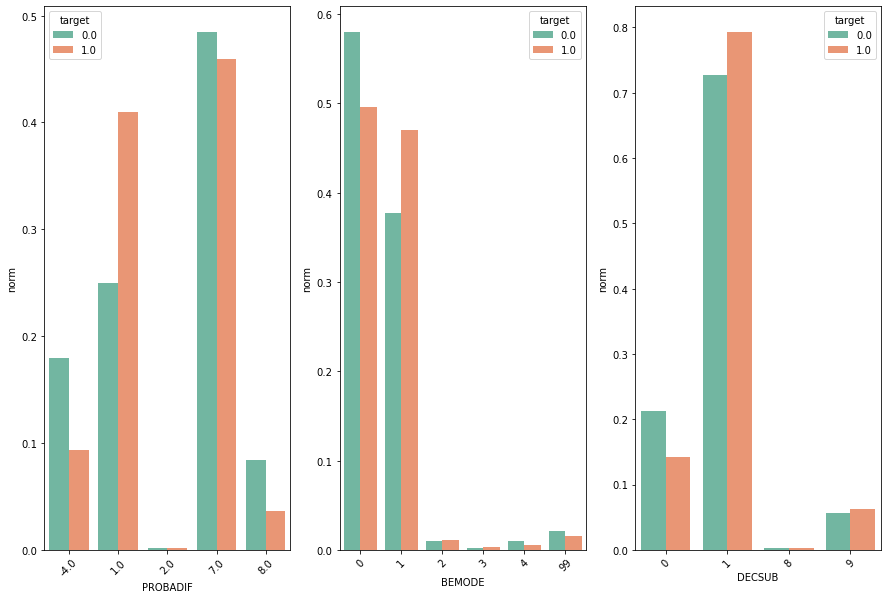

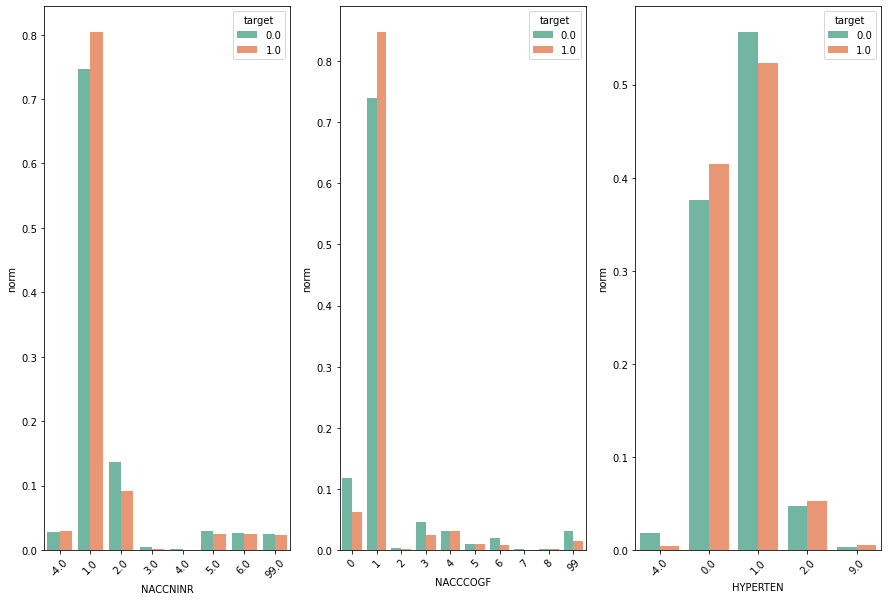

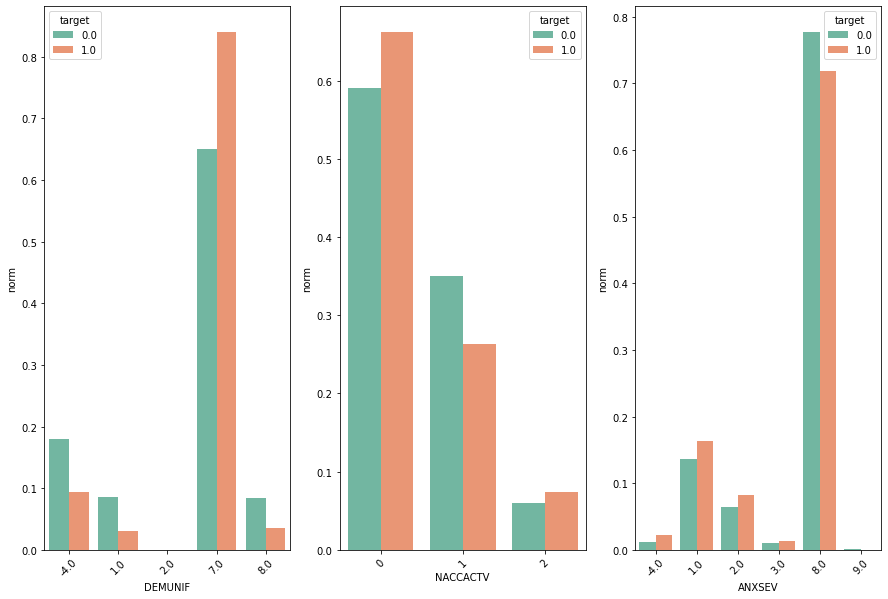

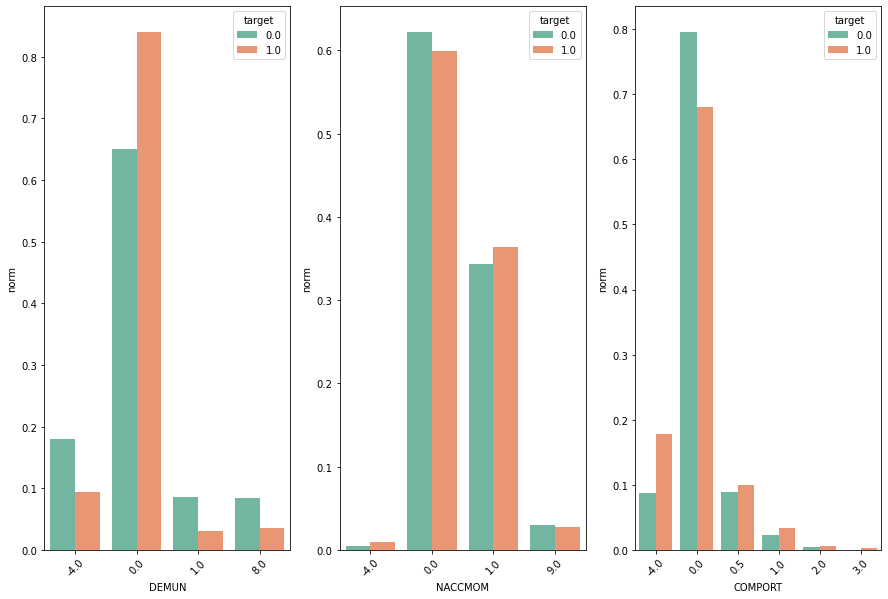

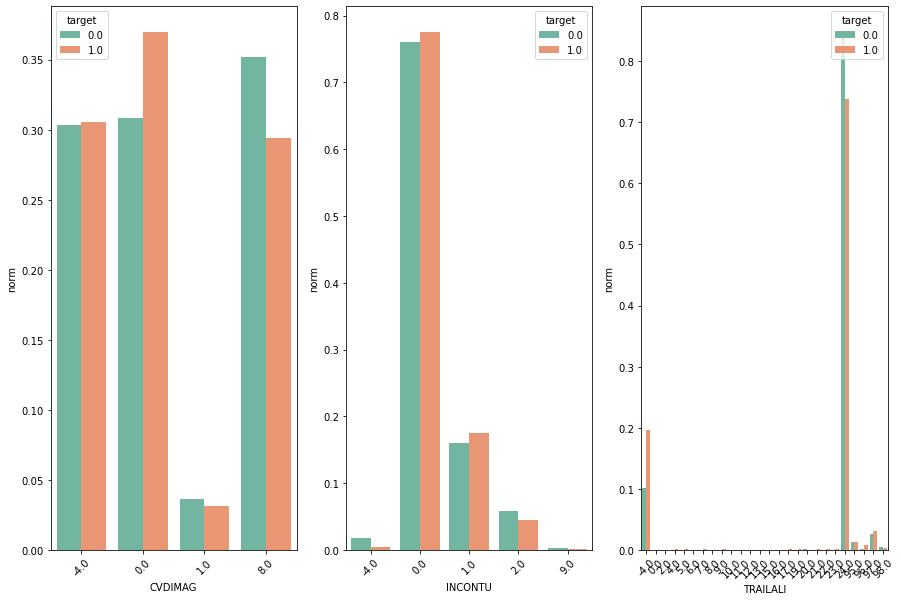

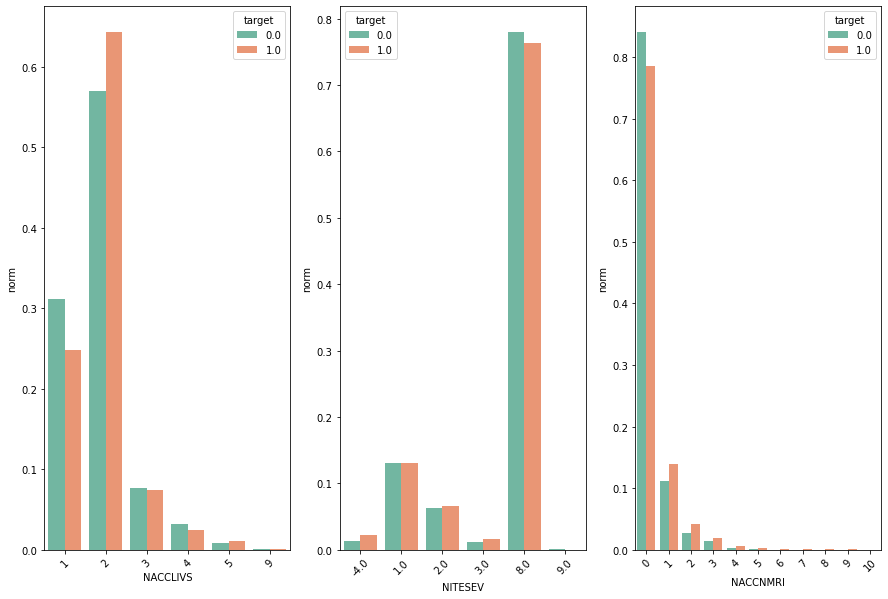

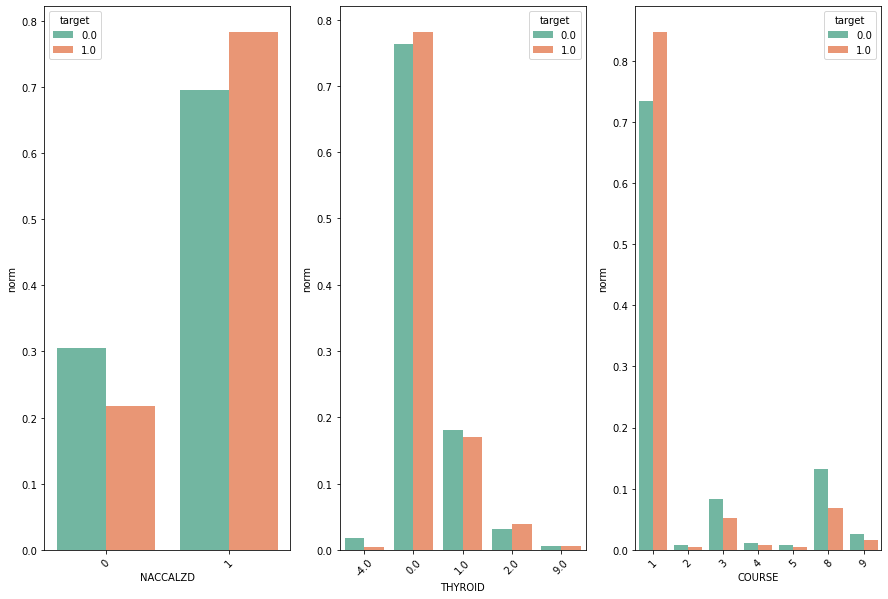

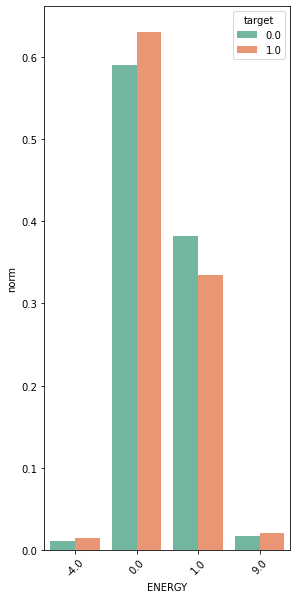

In [78]:
restrict=feat_importances.nlargest(100).index
dfres=res[restrict.to_list()]
temp=dfres.copy()
temp['target']=df['target']
norm_count_group(temp,'target')